In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('../data/train.csv', index_col='ID')
test = pd.read_csv('../data/test.csv', index_col='ID')

## Feature Analysis

In [6]:
def get_constant_features(df):
    columns = df.columns
    return [col for col in columns if df[col].std() == 0.0]

constant_features = get_constant_features(train)

In [10]:
def identical_features(df):
    columns = df.columns
    identical_feat = []
    
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            if (df[columns[i]] == df[columns[j]]).all():
                identical_feat.append(columns[i])
    
    return identical_feat

identical_feat = identical_features(train)

In [12]:
identical_feat_list = list(set(identical_feat))

In [15]:
def get_features_to_remove(constant_features, identical_features):
    features_to_remove = []
    
    for feat in constant_features:
        features_to_remove.append(feat)
    
    for feat in identical_features:
        features_to_remove.append(feat)
    
    return features_to_remove

In [16]:
features_to_remove = get_features_to_remove(constant_features, identical_feat_list)

In [17]:
features_to_remove.append('TARGET')
final_features = train.columns.drop(features_to_remove)

In [19]:
X = train[final_features]
y = train.TARGET

In [21]:
from sklearn.cross_validation import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(y, n_iter=3, train_size=5000, random_state=44)
train_index, test_index = next(iter(sss))

X_train = X.iloc[train_index]
y_train = y.iloc[train_index]

## Exploratory Data Analysis

In [23]:
from sklearn.manifold import TSNE

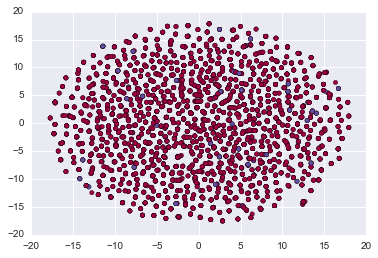

In [ ]:
tsne = TSNE(n_components=2, perplexity=2.0, init='random', random_state=0)
Y_transformed = tsne.fit_transform(X_train)
plt.scatter(Y_transformed[:, 0], Y_transformed[:, 1], c=y_train, cmap=plt.cm.Spectral);

## Summary Statistics

In [7]:
train.describe()

var3         var15  imp_ent_var16_ult1  \
count   76020.000000  76020.000000        76020.000000   
mean    -1523.199277     33.212865           86.208265   
std     39033.462364     12.956486         1614.757313   
min   -999999.000000      5.000000            0.000000   
25%         2.000000     23.000000            0.000000   
50%         2.000000     28.000000            0.000000   
75%         2.000000     40.000000            0.000000   
max       238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  \
count             76020.000000             76020.000000       76020.000000   
mean                  0.412946                 0.567352           3.160715   
std                  30.604864                36.513513          95.268204   
min                   0.000000                 0.000000           0.000000   
25%                   0.000000                 0.000000           0.000000   
50%                   0.000000                 0.000000           0.000000   
75%                   0.000000                 0.000000           0.000000   
max                6600.000000              6600.000000        8237.820000   

           ...       saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
count      ...                  76020.000000             76020.000000   
mean       ...                      7.935824                 1.365146   
std        ...                    455.887218               113.959637   
min        ...                      0.000000                 0.000000   
25%        ...                      0.000000                 0.000000   
50%        ...                      0.000000                 0.000000   
75%        ...                      0.000000                 0.000000   
max        ...                  50003.880000             20385.720000   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
count            76020.000000            76020.000000   
mean                12.215580                8.784074   
std                783.207399              538.439211   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max             138831.630000            91778.730000   

       saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
count             76020.000000             76020.000000   
mean                 31.505324                 1.858575   
std                2013.125393               147.786584   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              438329.220000             24650.010000   

       saldo_medio_var

## Number of unique values for each of the variables

In [75]:
features = train.columns.drop('TARGET')
num_unique_values_train = {}
num_unique_values_test = {}

for feature in features:
    print 'Number of unique values of %s in training set %d and in test set %d ' %(feature, len(train[feature].unique()), \
                                                                             len(test[feature].unique()))
    num_unique_values_train[feature] = len(train[feature].unique())
    num_unique_values_test[feature] = len(test[feature].unique())

Number of unique values of var3 in training set 208 and in test set 199 
Number of unique values of var15 in training set 100 and in test set 100 
Number of unique values of imp_ent_var16_ult1 in training set 596 and in test set 598 
Number of unique values of imp_op_var39_comer_ult1 in training set 7551 and in test set 7593 
Number of unique values of imp_op_var39_comer_ult3 in training set 9099 and in test set 9154 
Number of unique values of imp_op_var40_comer_ult1 in training set 293 and in test set 314 
Number of unique values of imp_op_var40_comer_ult3 in training set 346 and in test set 363 
Number of unique values of imp_op_var40_efect_ult1 in training set 23 and in test set 30 
Number of unique values of imp_op_var40_efect_ult3 in training set 29 and in test set 34 
Number of unique values of imp_op_var40_ult1 in training set 224 and in test set 245 
Number of unique values of imp_op_var41_comer_ult1 in training set 7421 and in test set 7444 
Number of unique values of imp_op_

** Quite lot of features with constant values, remove those features **

In [14]:
features_reduced = [feature for feature in features if num_unique_values_train[feature] > 1 \
                    and num_unique_values_test[feature] > 1]

In [15]:
print 'Number of original features were %d and number of reduced features are %d ' %(len(features), \
                                                                                     len(features_reduced))

Number of original features were 369 and number of reduced features are 324 


** So we have managed to reduce feature set with this simple observation **

## Visualizing the distribution

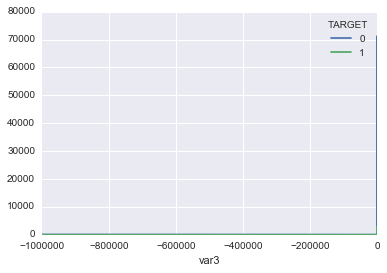

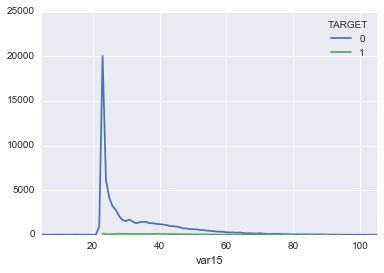

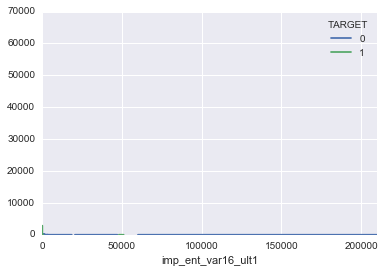

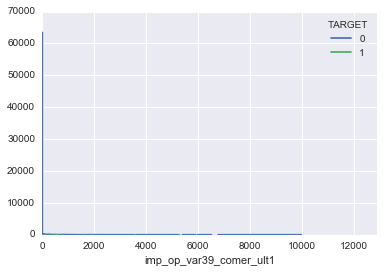

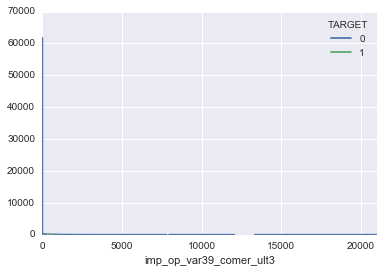

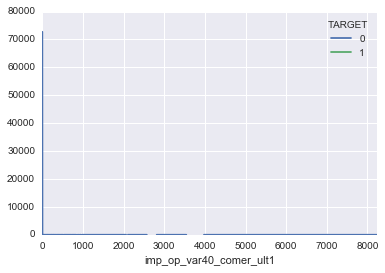

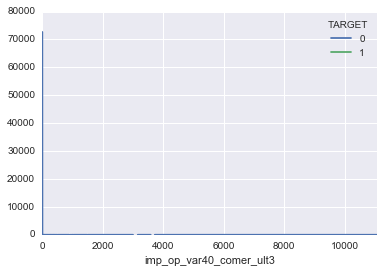

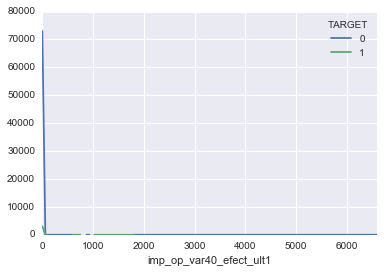

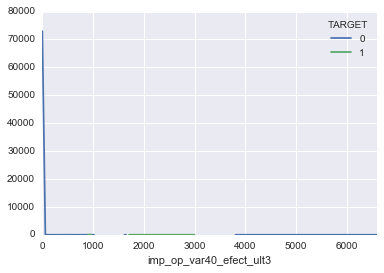

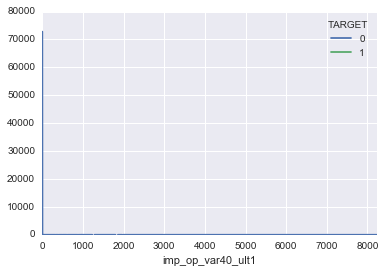

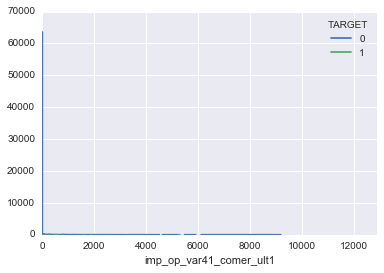

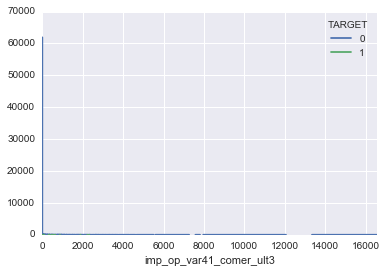

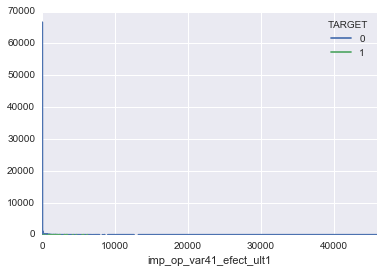

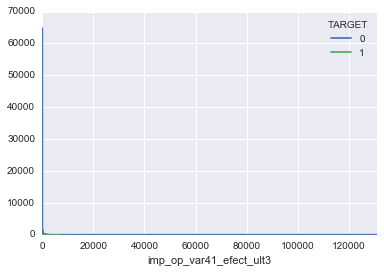

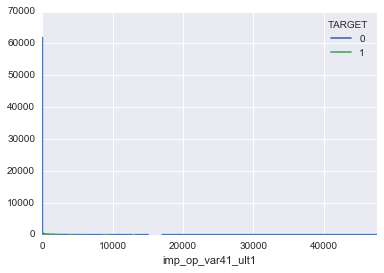

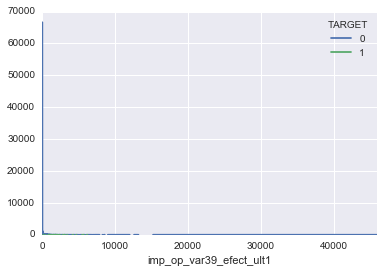

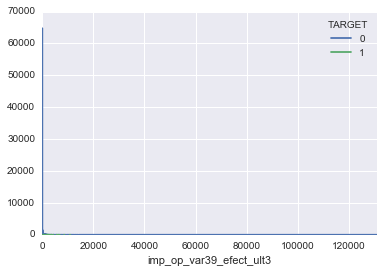

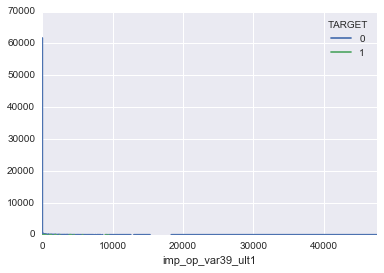

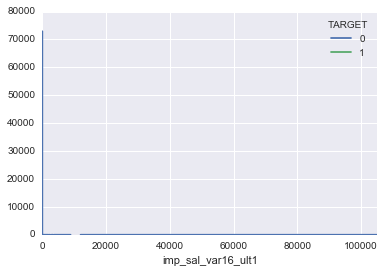

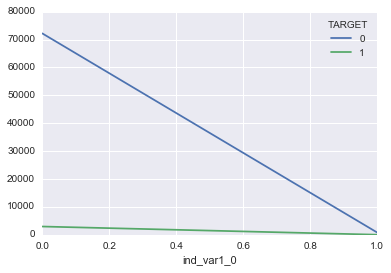

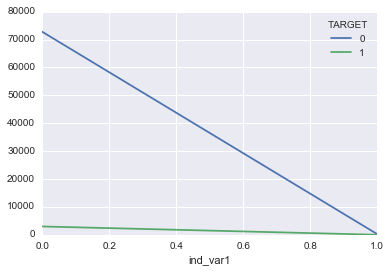

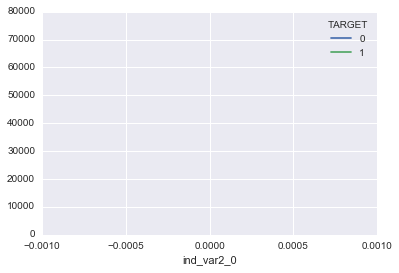

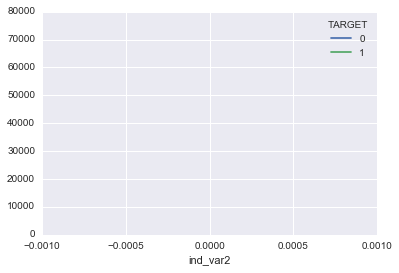

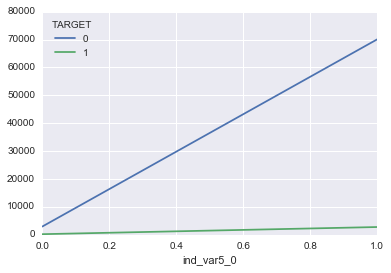

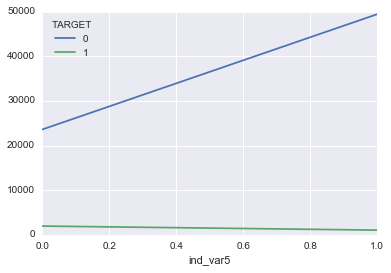

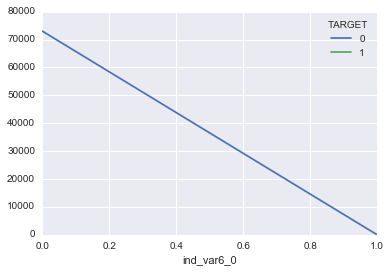

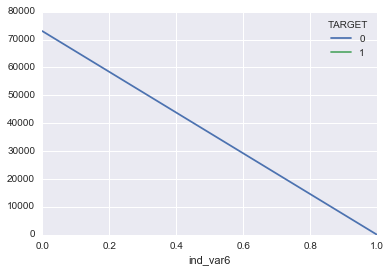

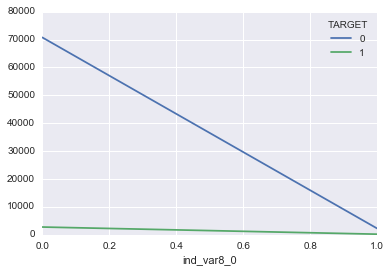

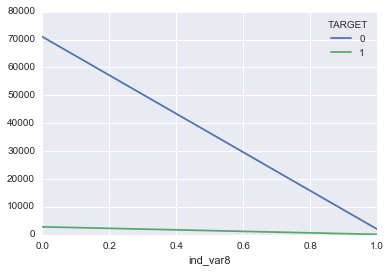

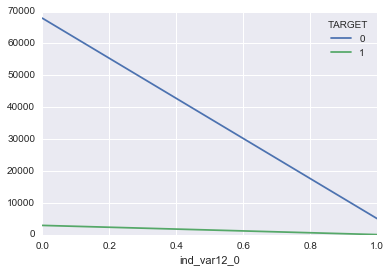

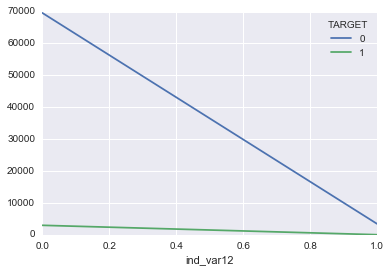

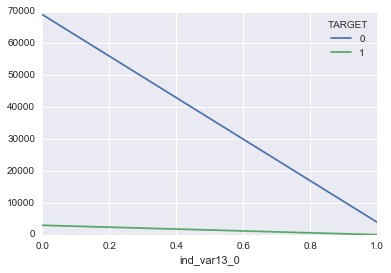

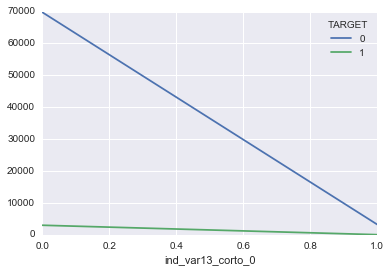

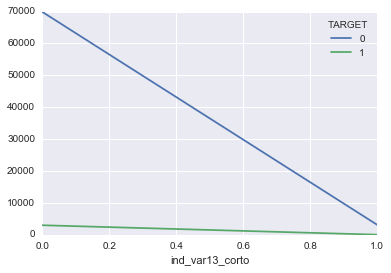

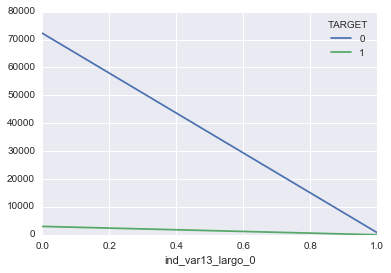

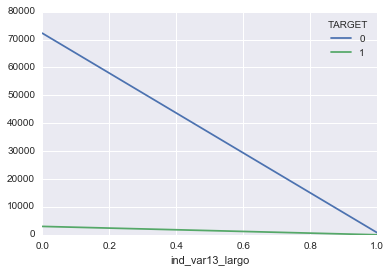

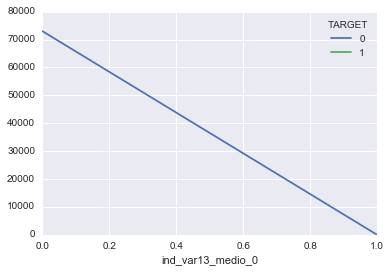

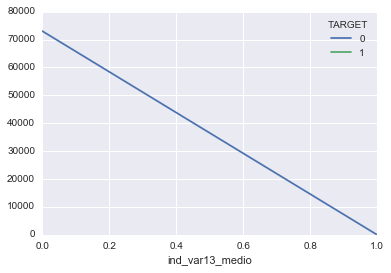

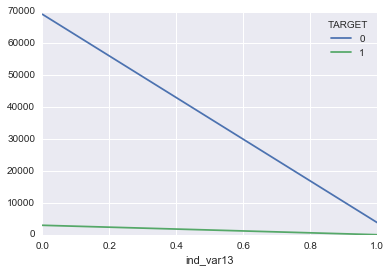

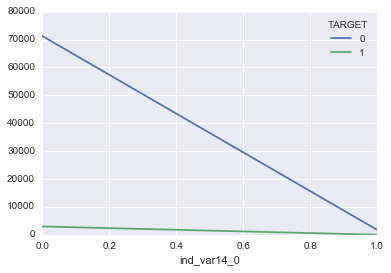

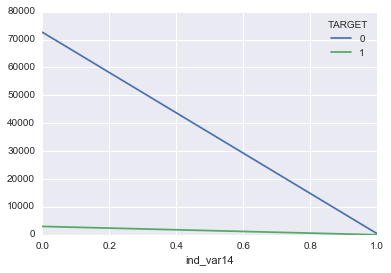

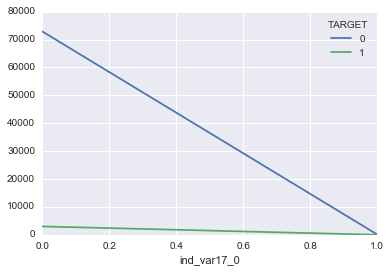

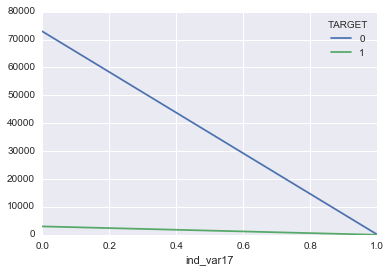

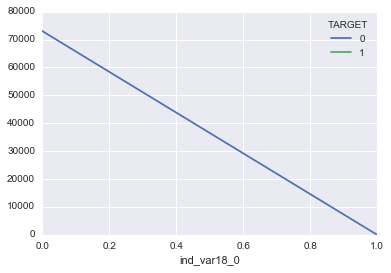

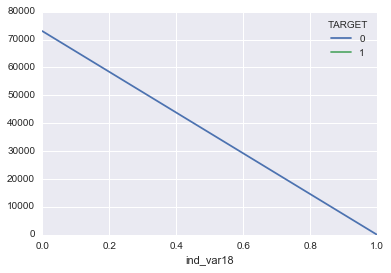

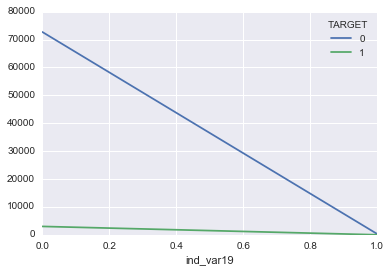

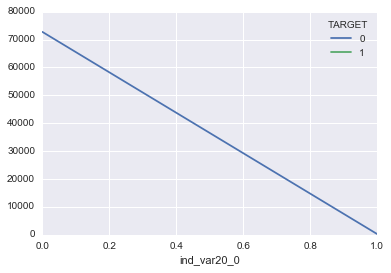

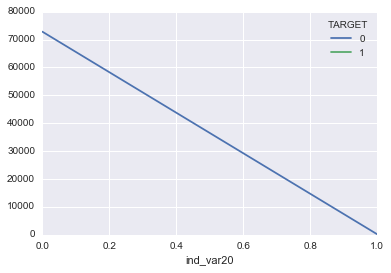

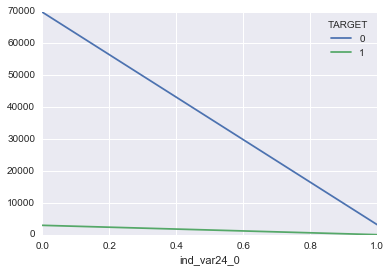

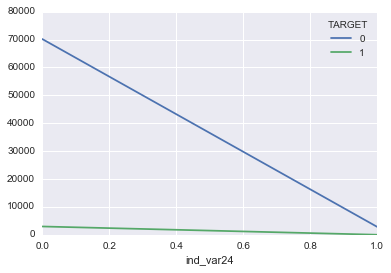

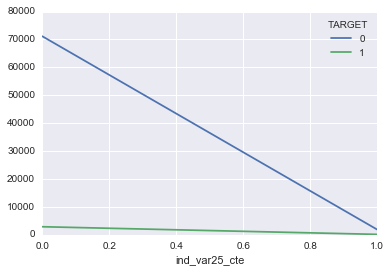

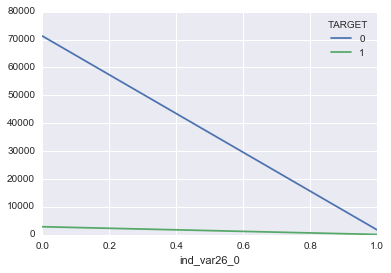

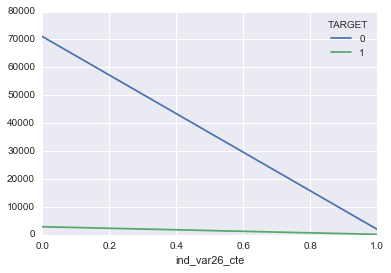

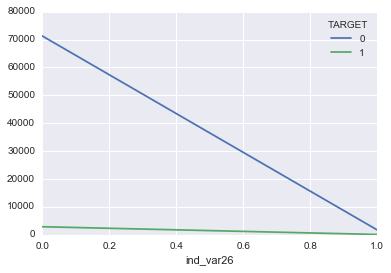

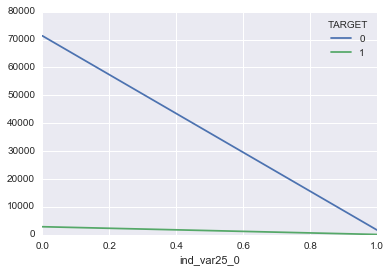

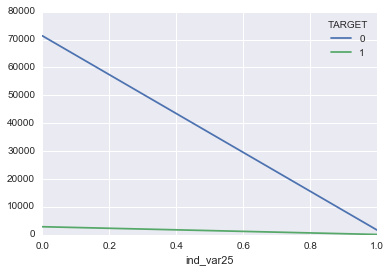

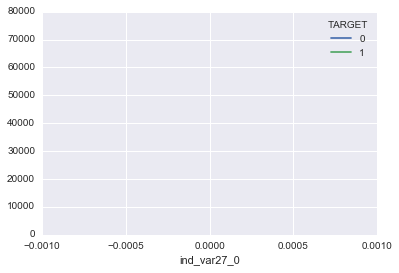

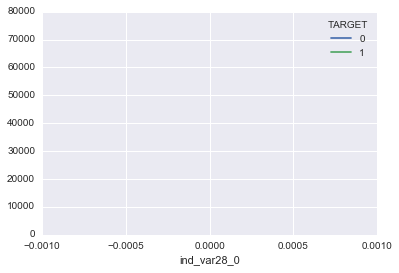

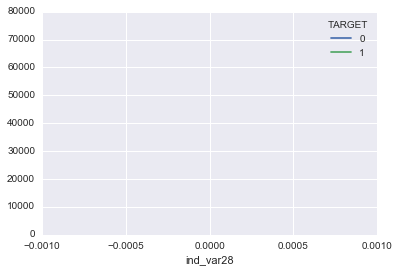

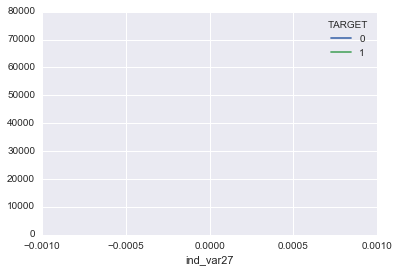

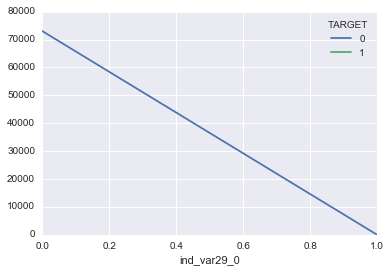

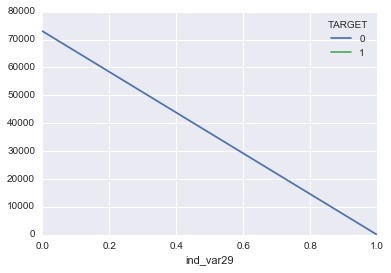

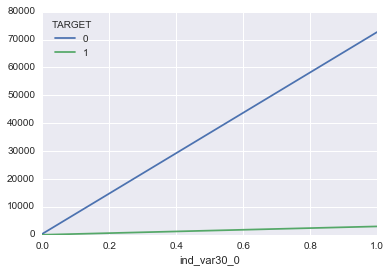

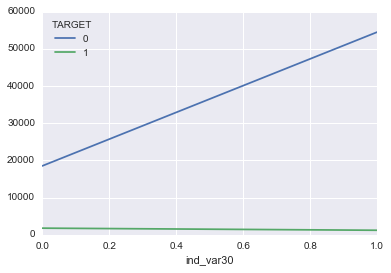

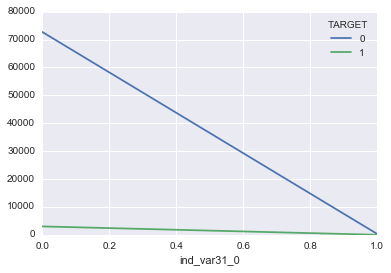

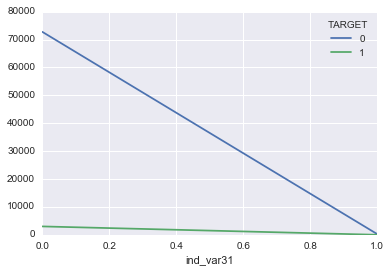

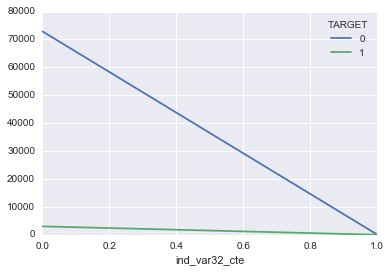

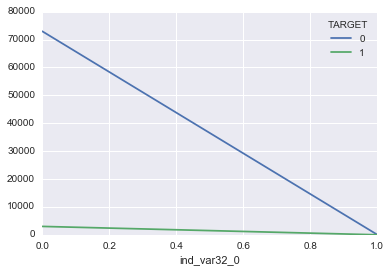

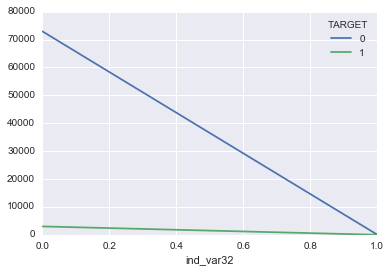

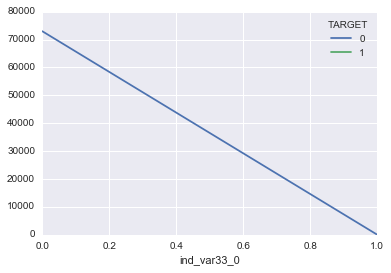

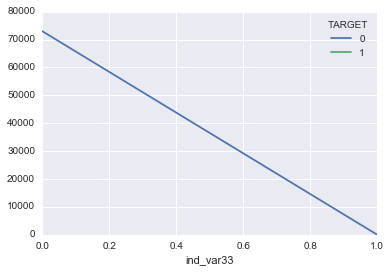

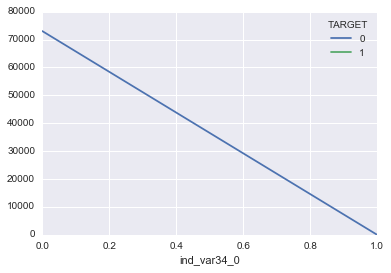

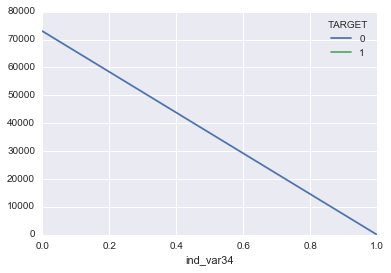

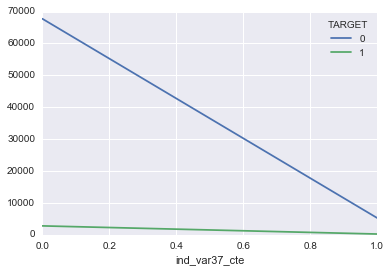

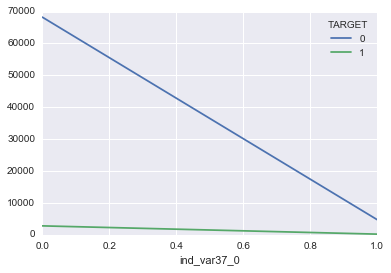

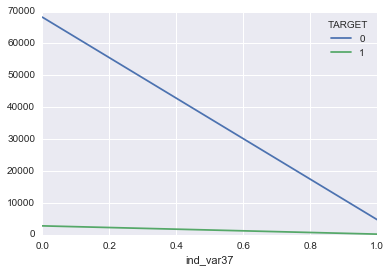

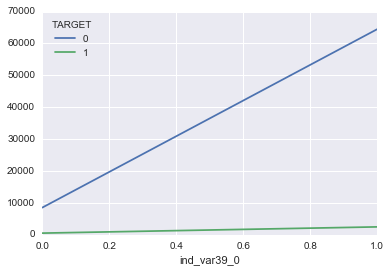

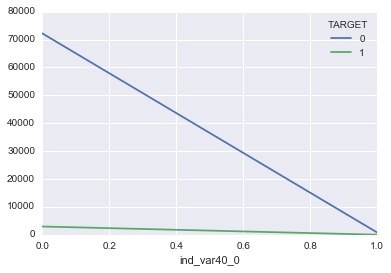

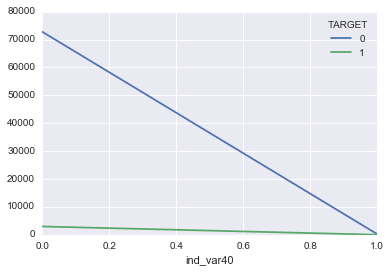

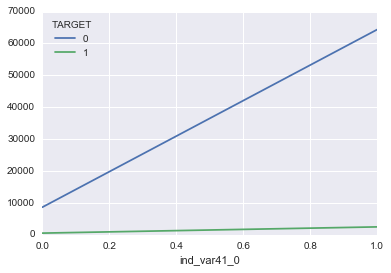

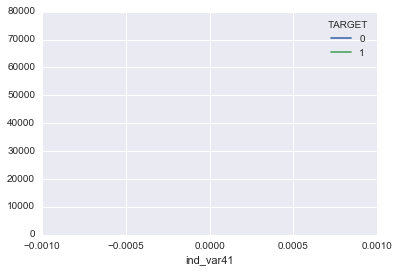

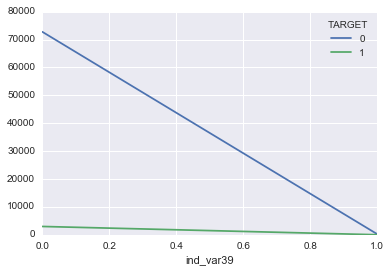

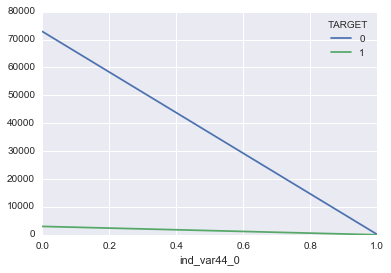

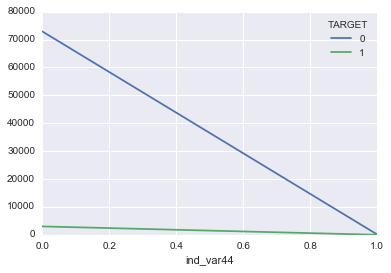

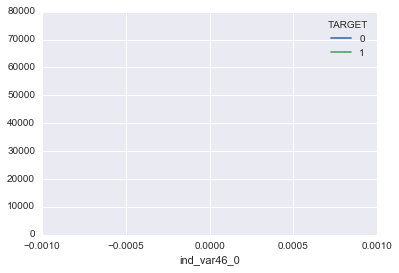

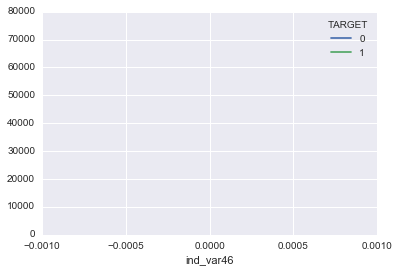

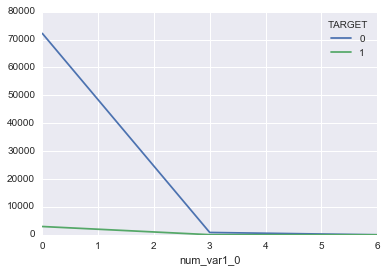

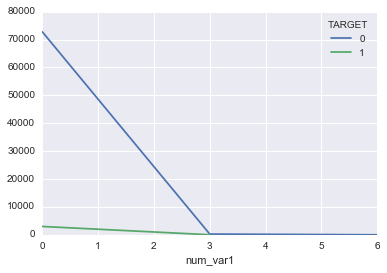

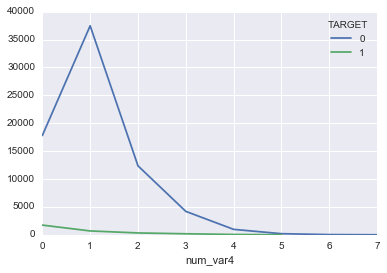

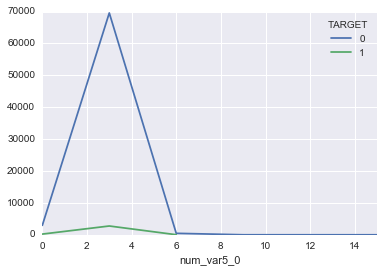

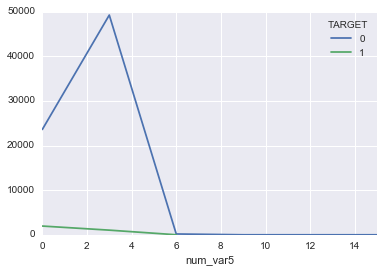

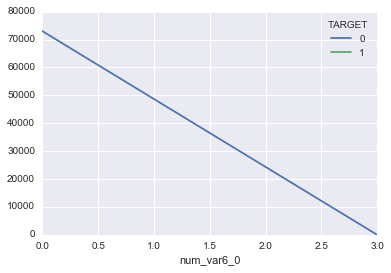

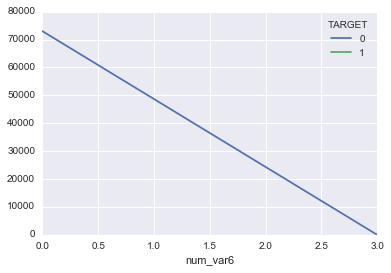

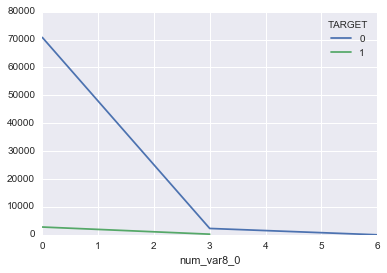

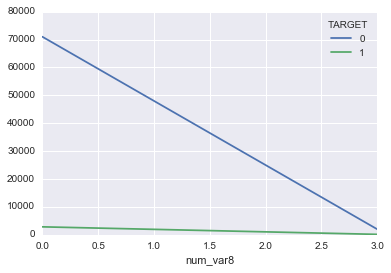

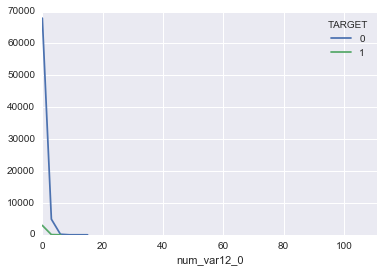

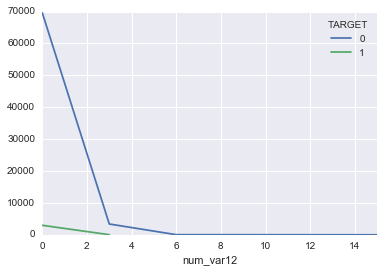

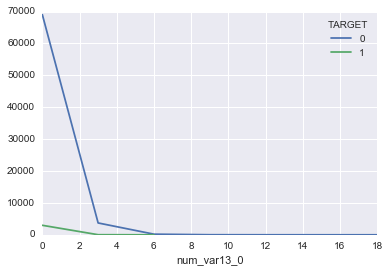

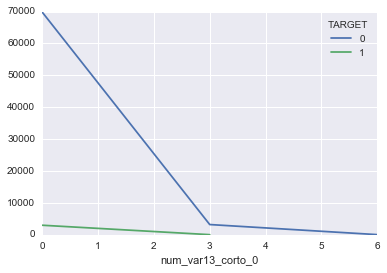

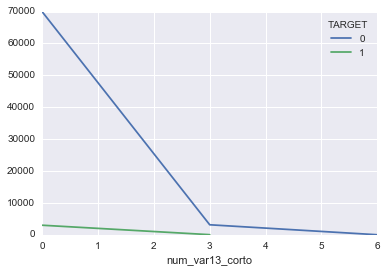

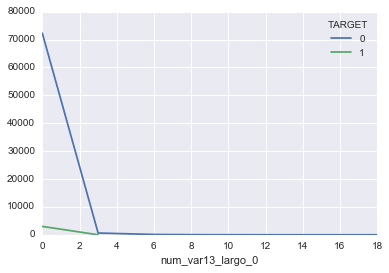

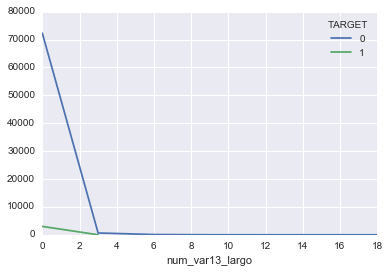

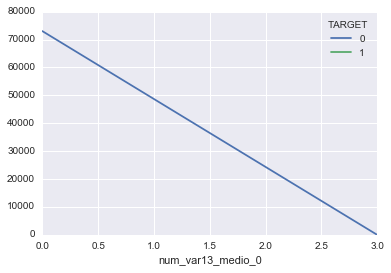

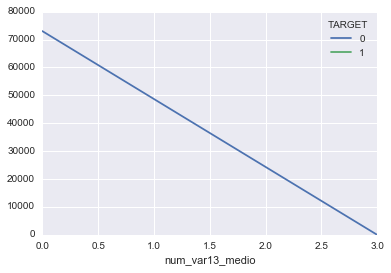

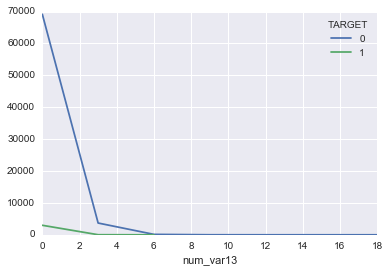

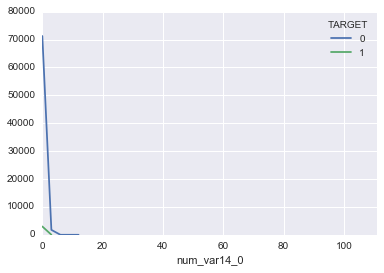

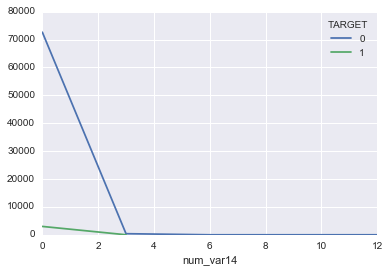

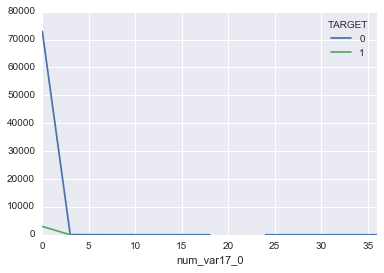

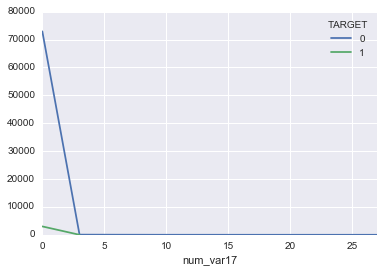

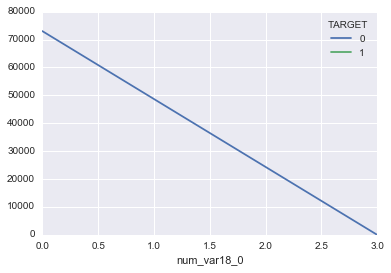

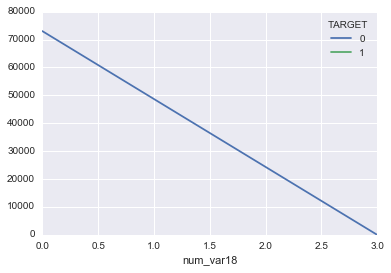

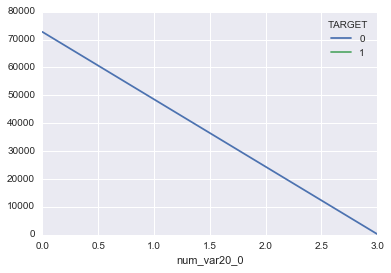

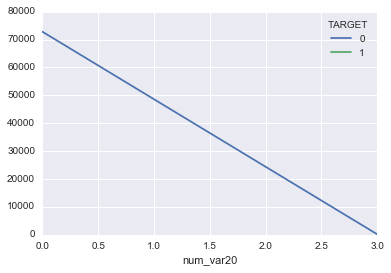

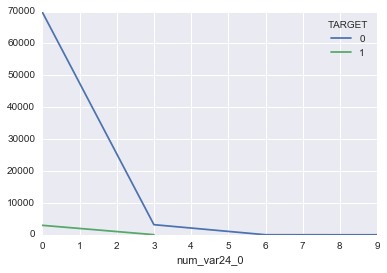

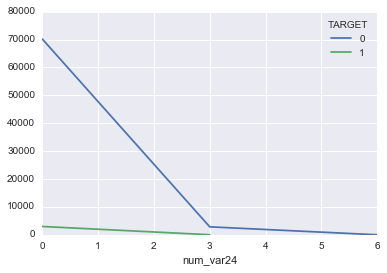

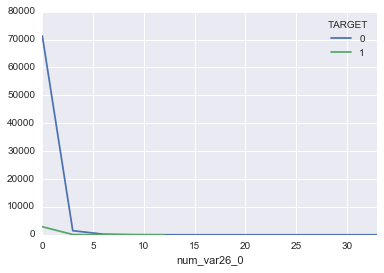

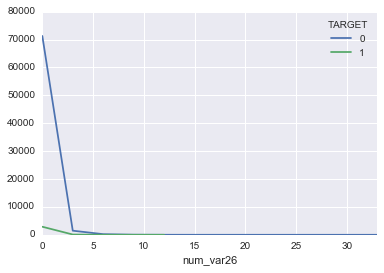

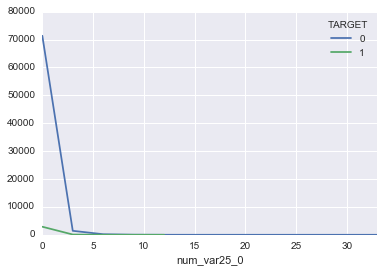

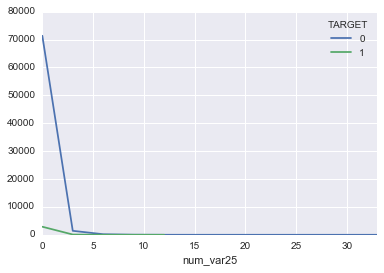

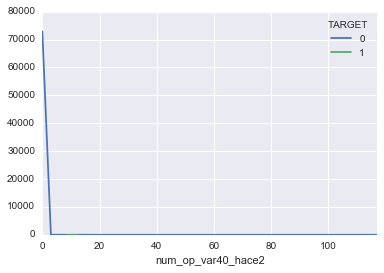

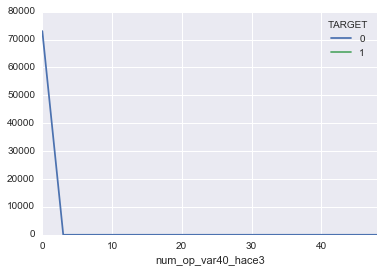

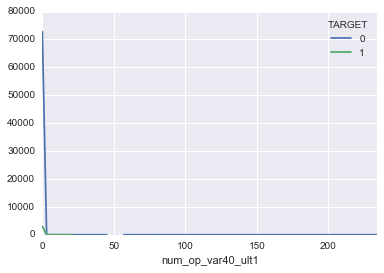

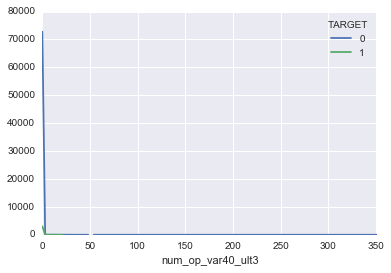

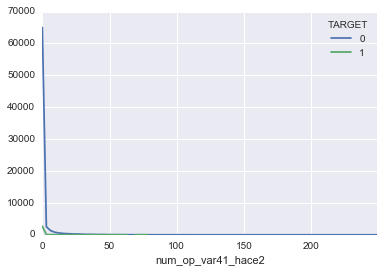

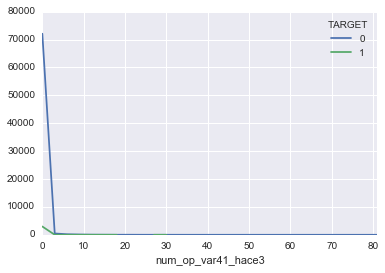

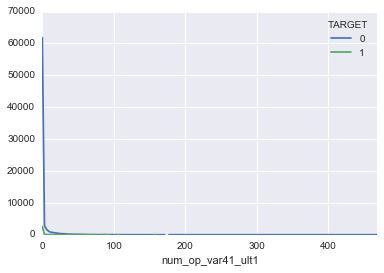

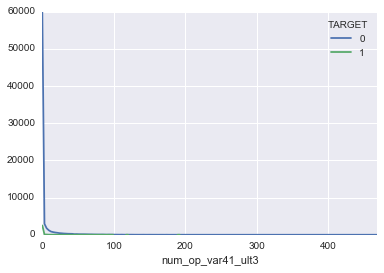

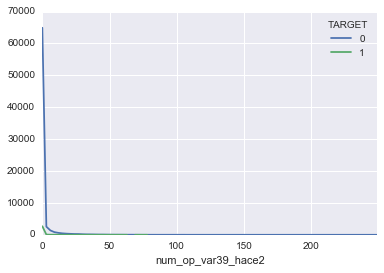

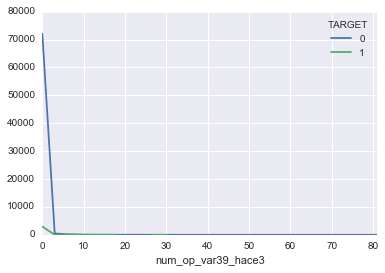

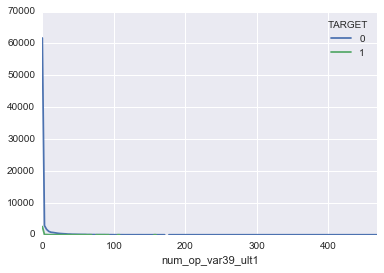

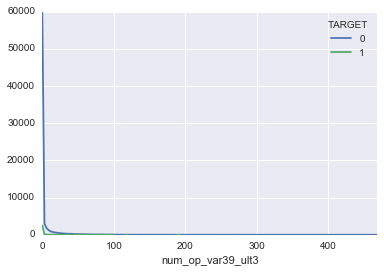

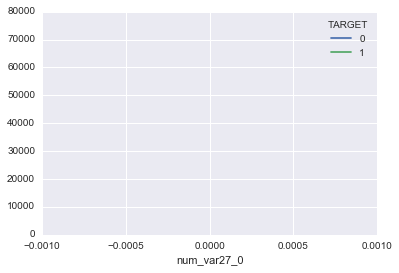

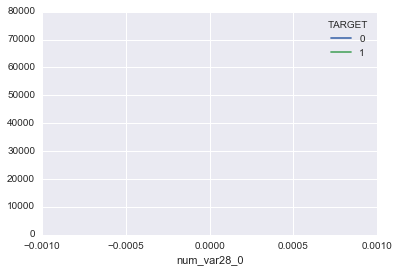

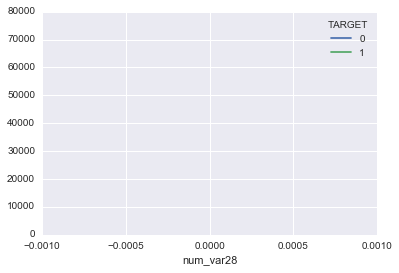

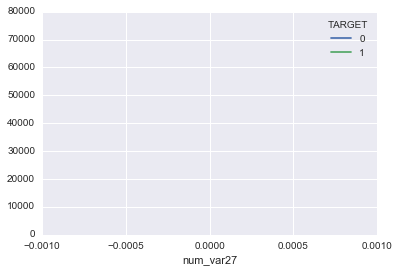

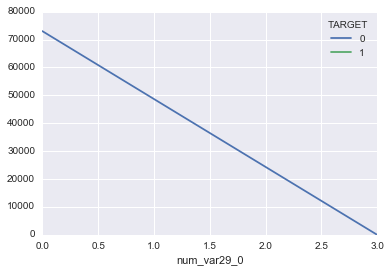

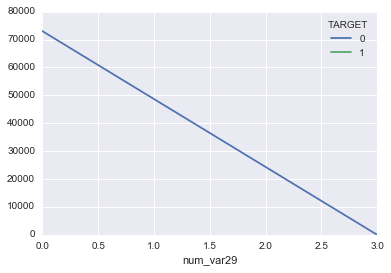

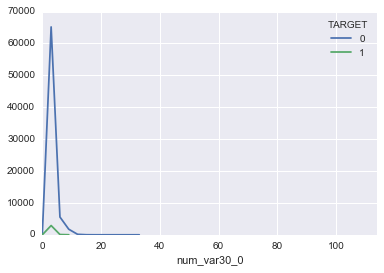

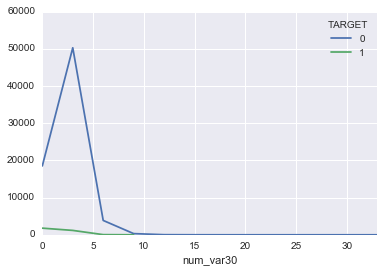

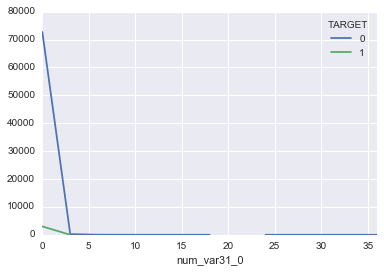

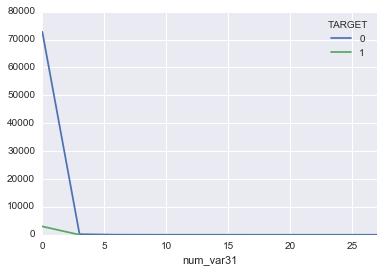

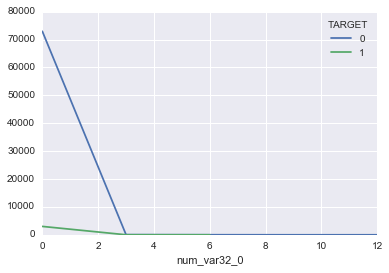

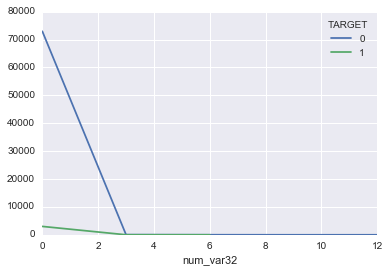

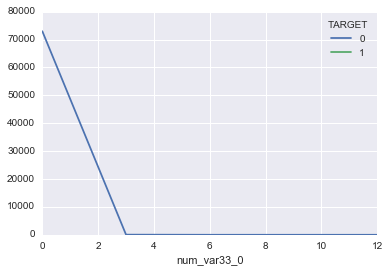

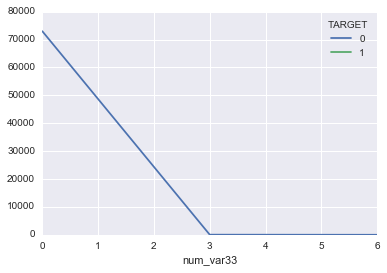

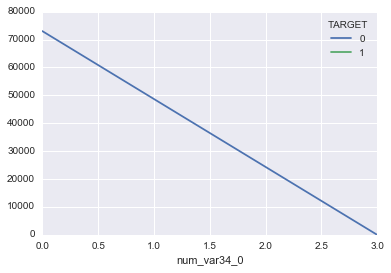

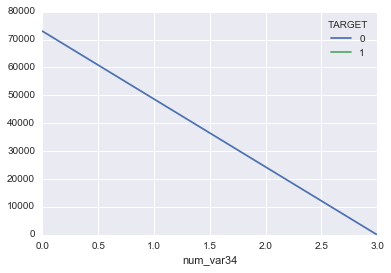

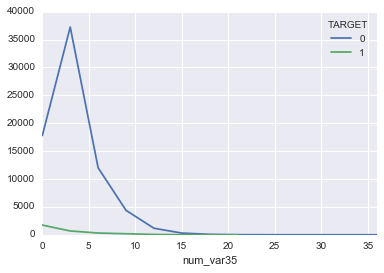

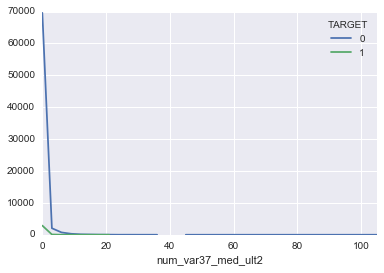

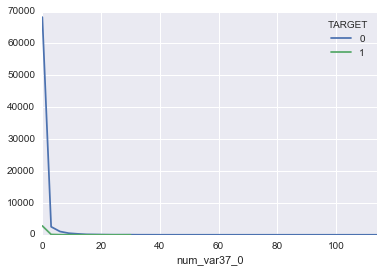

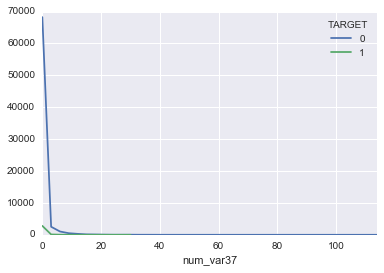

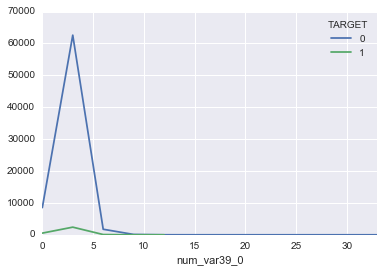

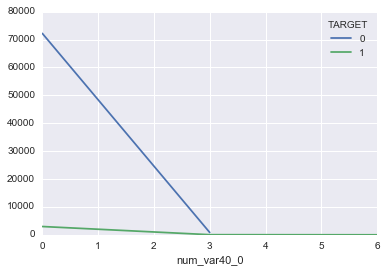

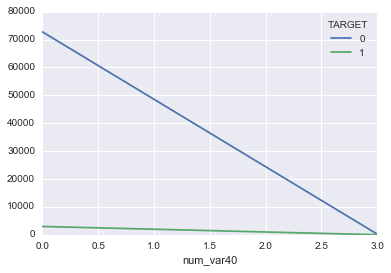

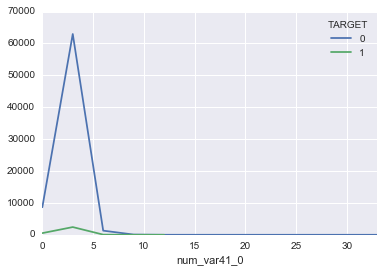

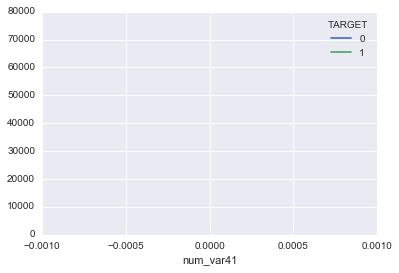

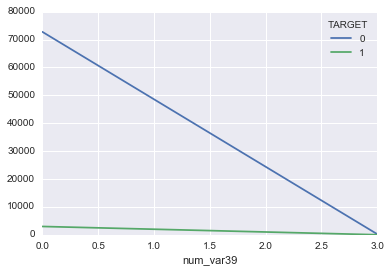

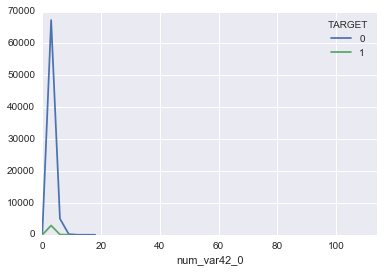

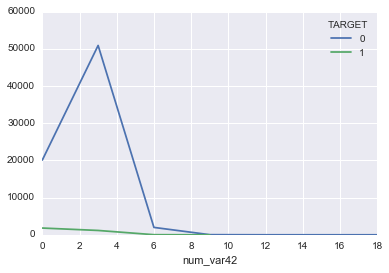

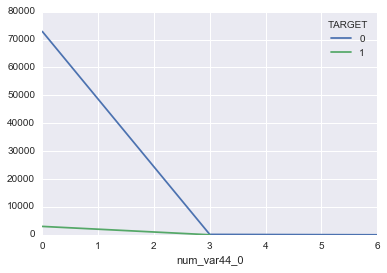

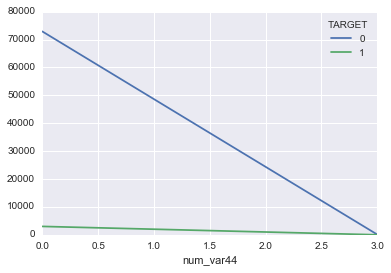

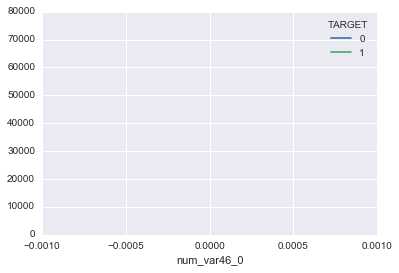

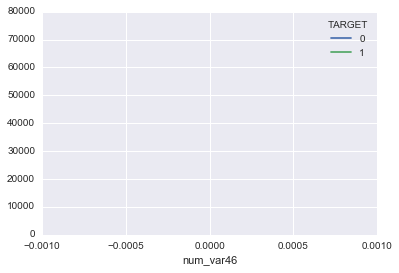

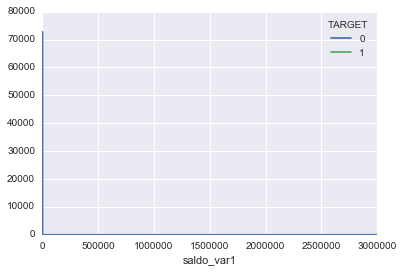

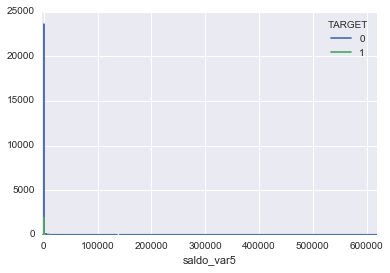

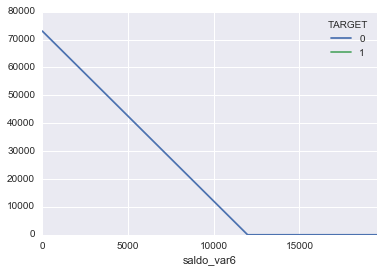

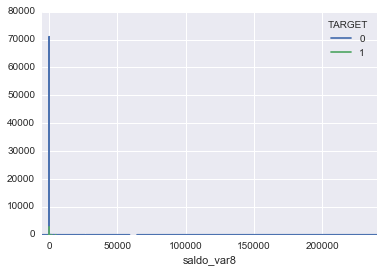

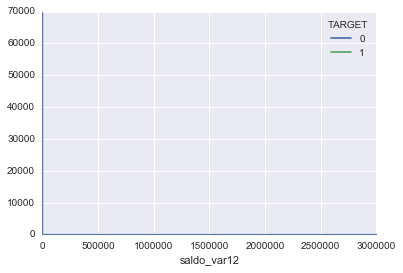

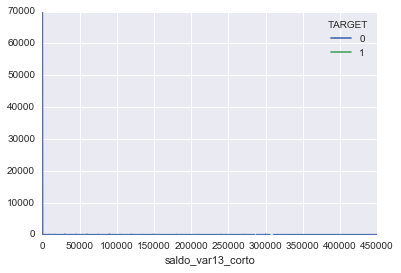

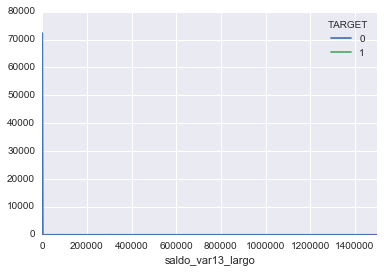

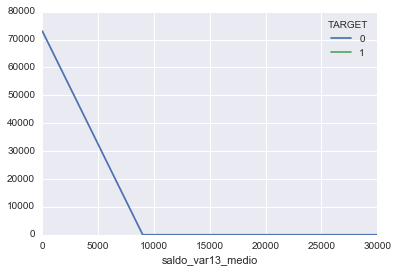

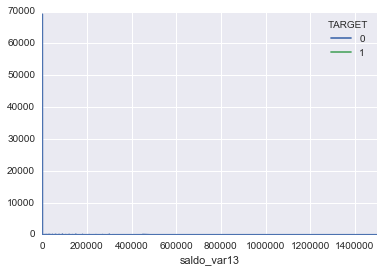

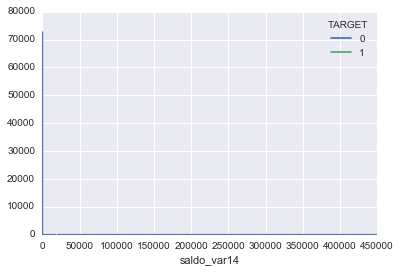

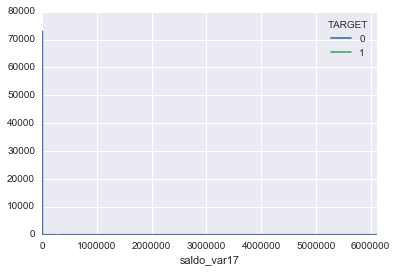

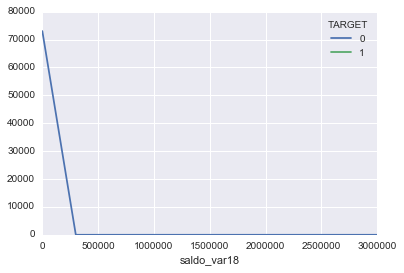

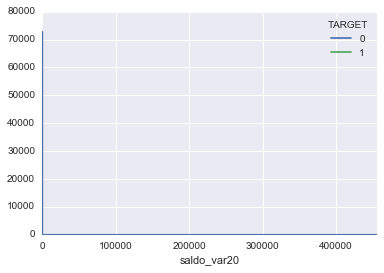

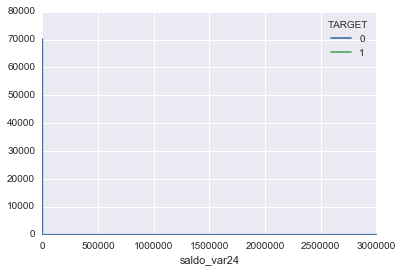

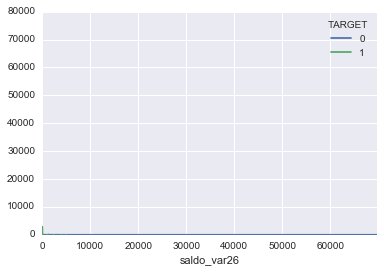

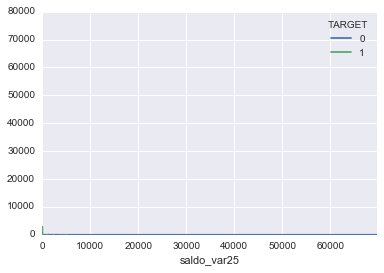

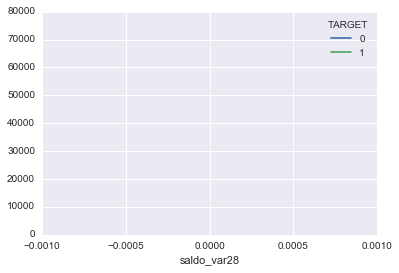

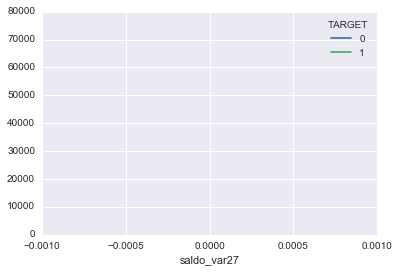

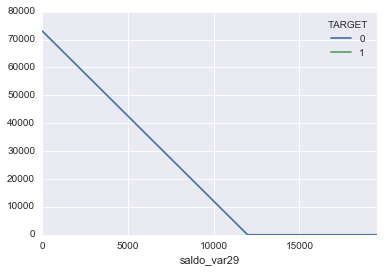

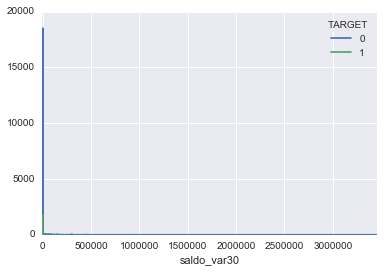

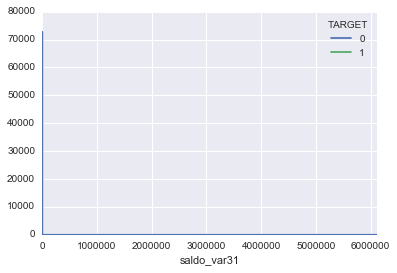

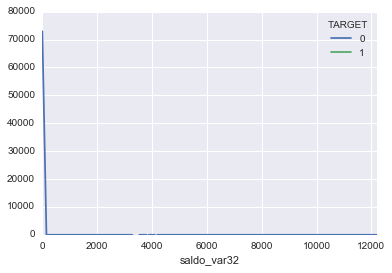

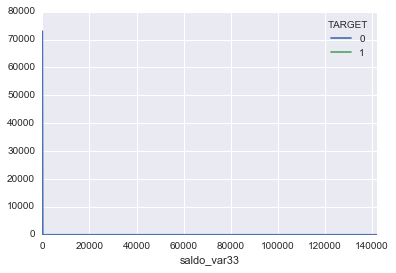

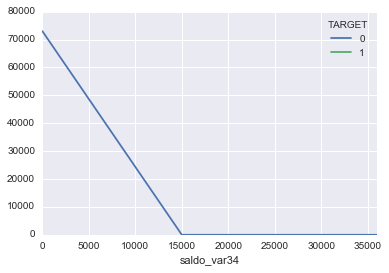

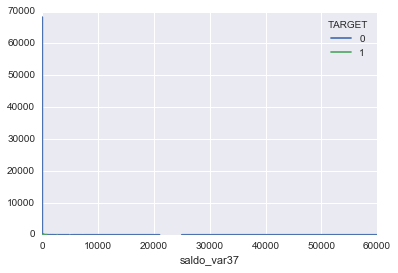

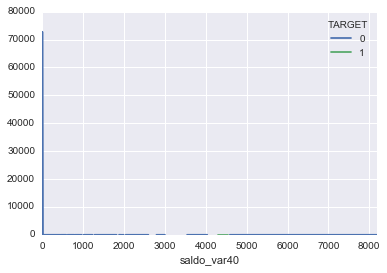

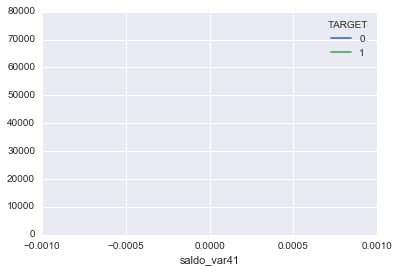

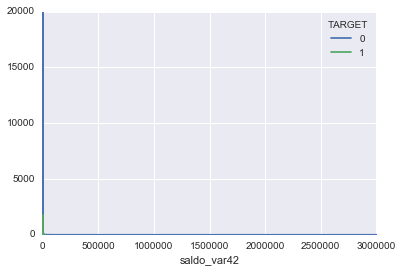

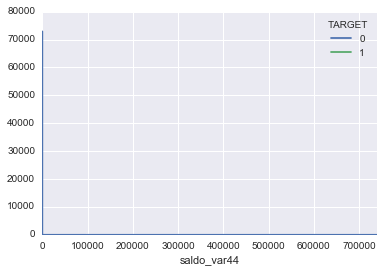

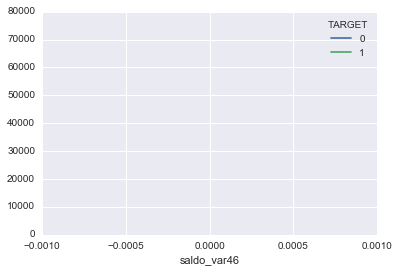

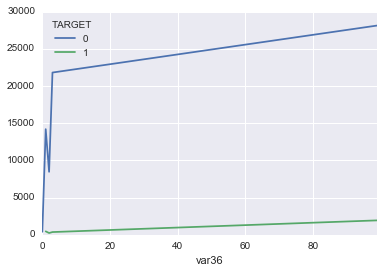

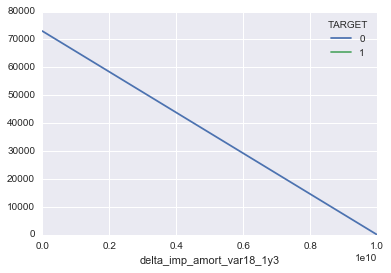

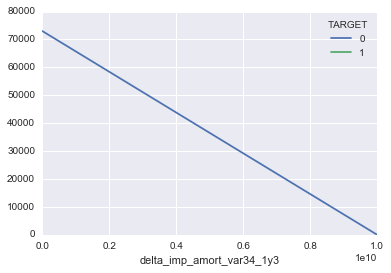

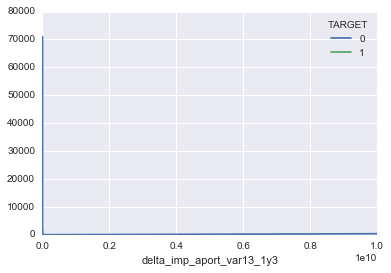

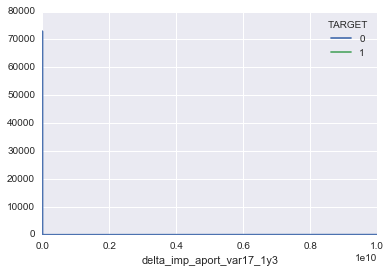

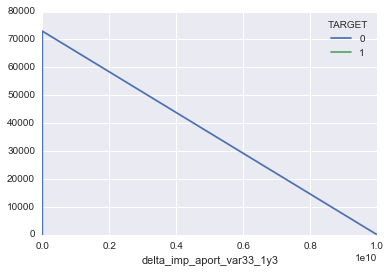

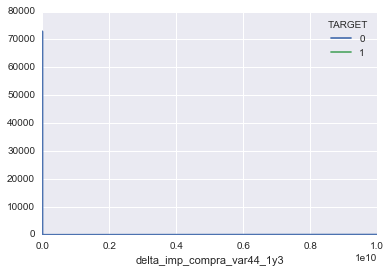

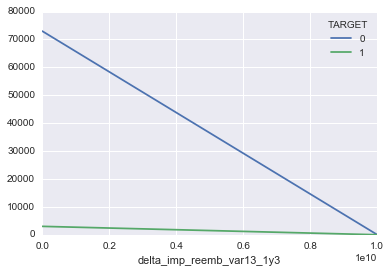

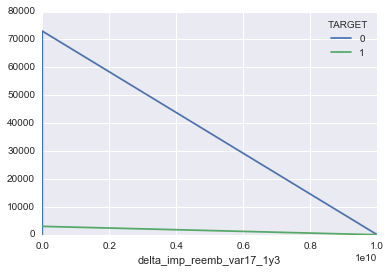

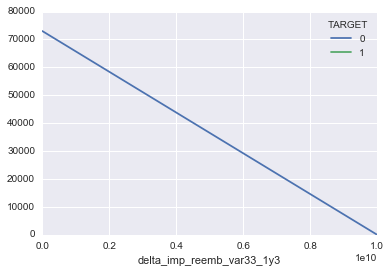

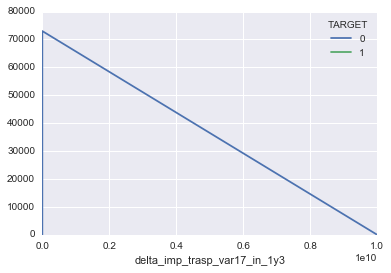

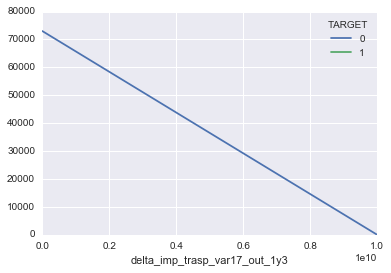

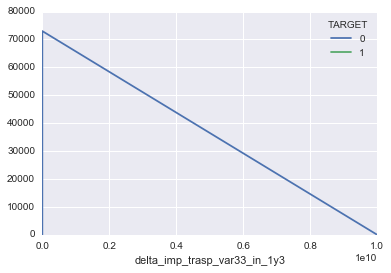

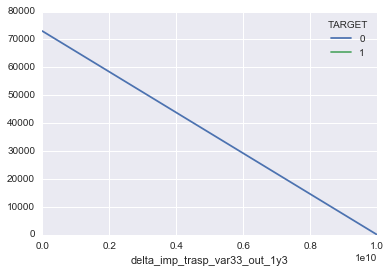

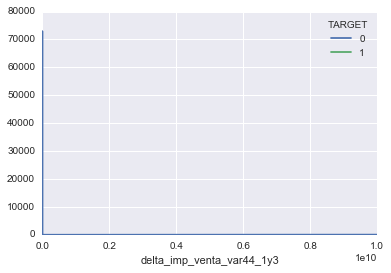

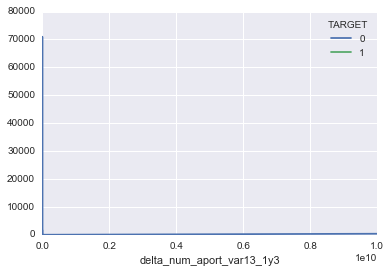

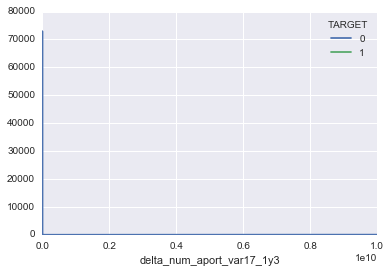

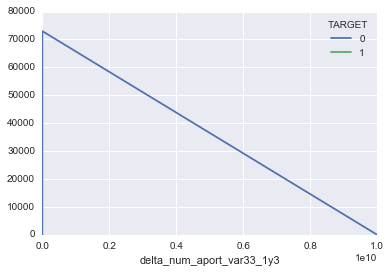

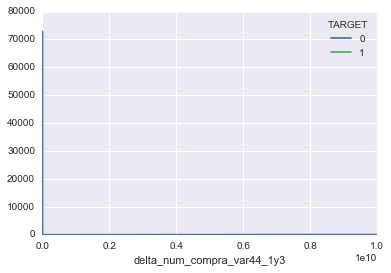

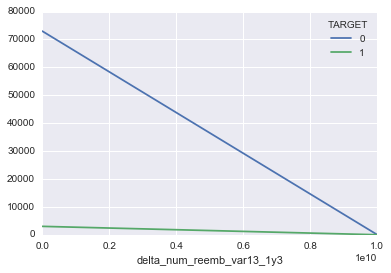

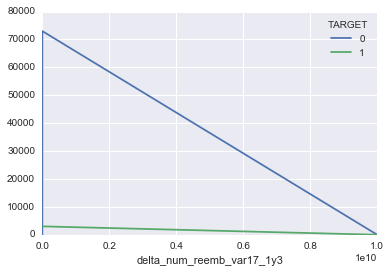

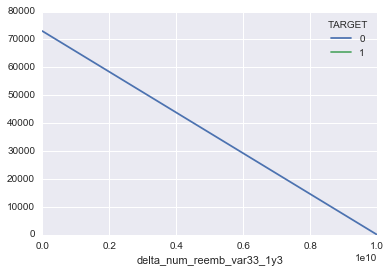

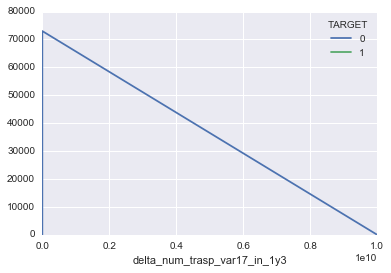

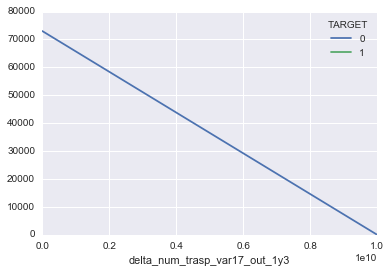

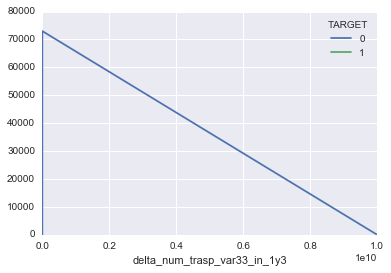

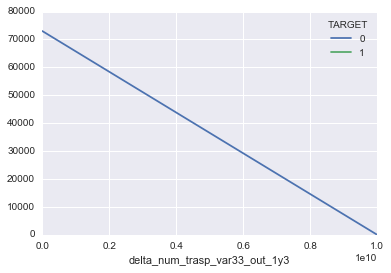

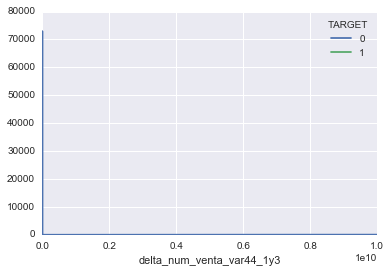

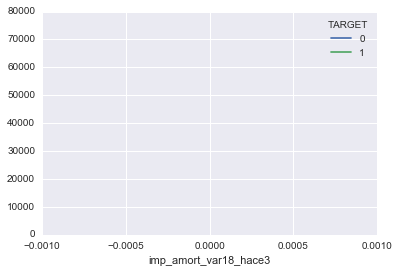

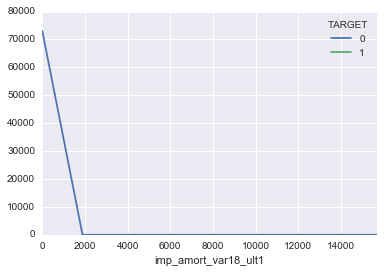

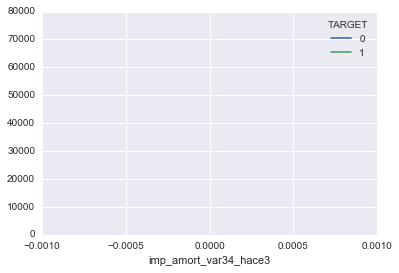

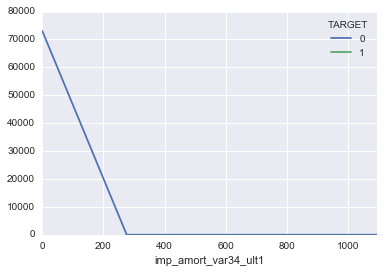

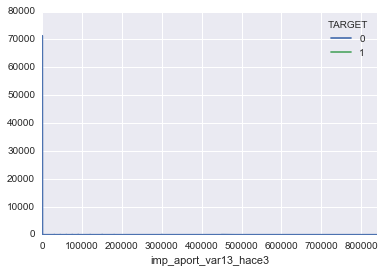

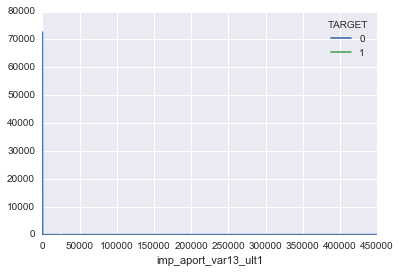

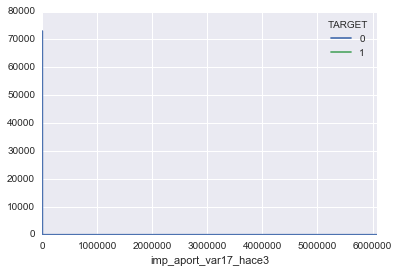

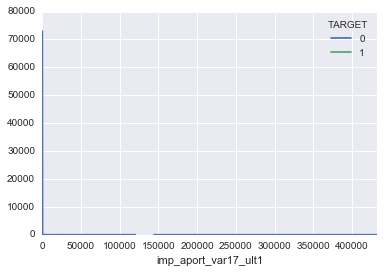

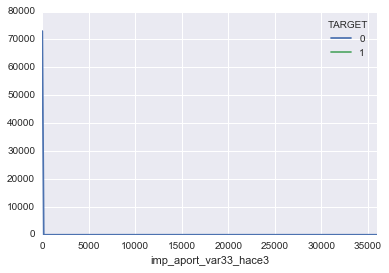

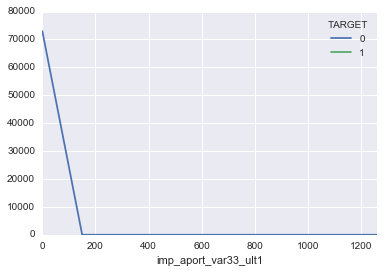

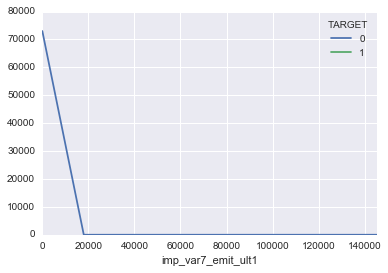

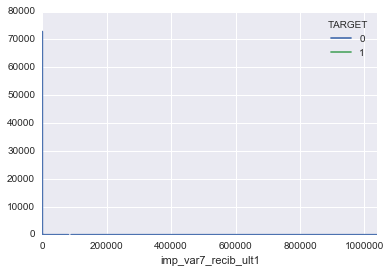

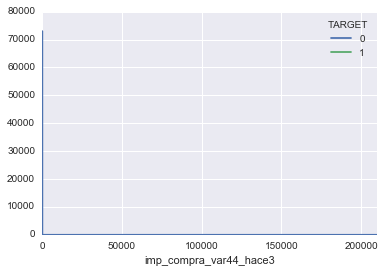

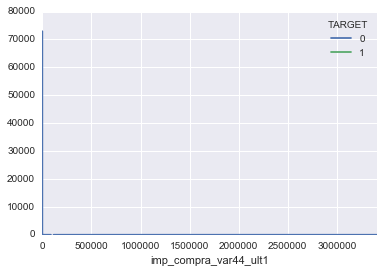

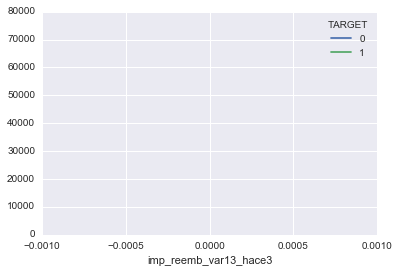

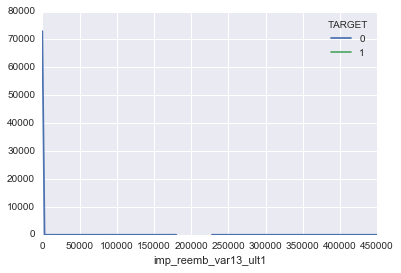

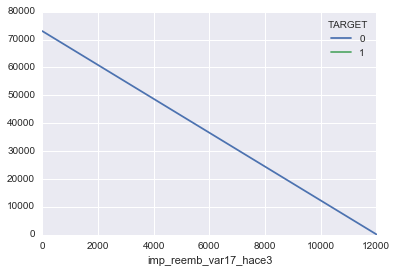

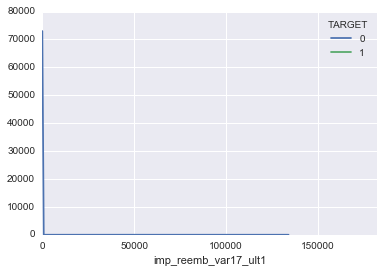

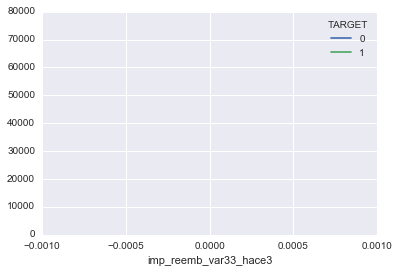

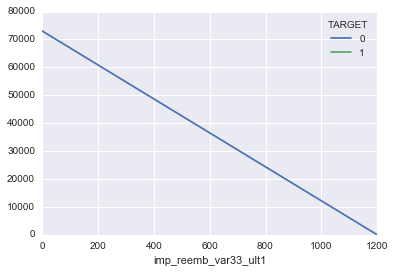

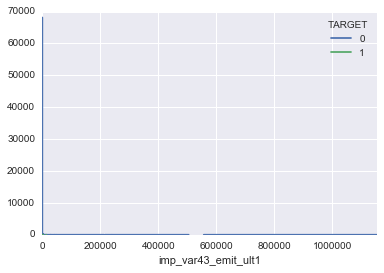

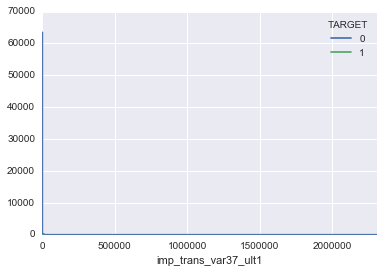

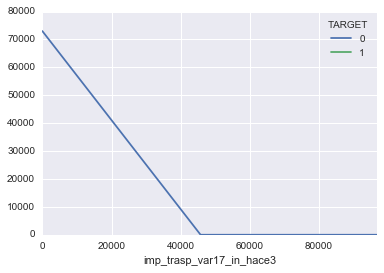

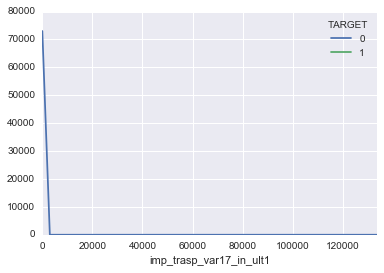

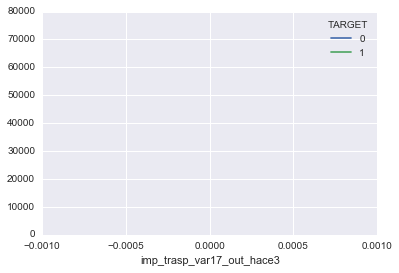

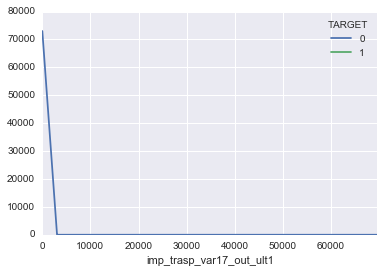

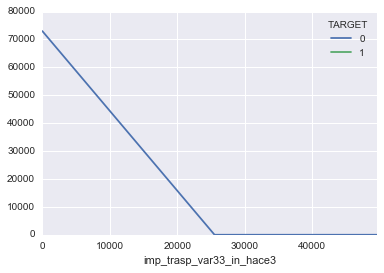

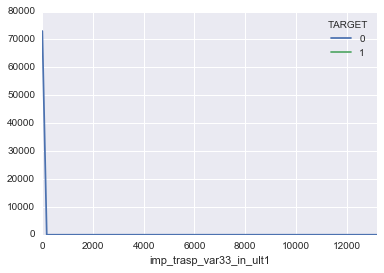

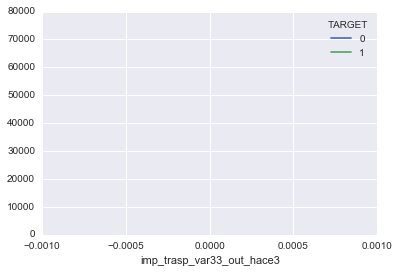

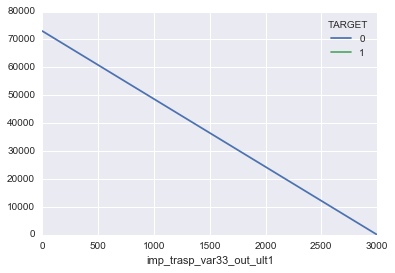

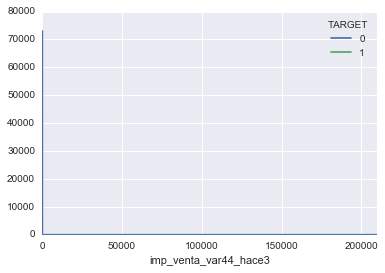

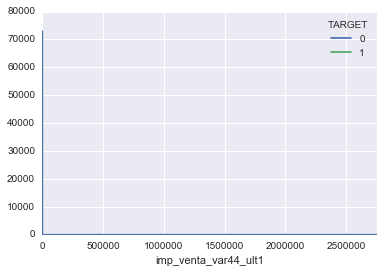

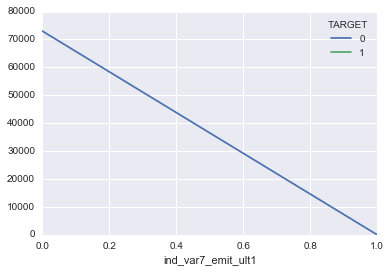

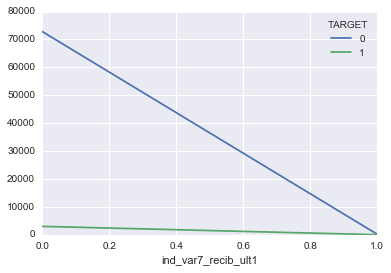

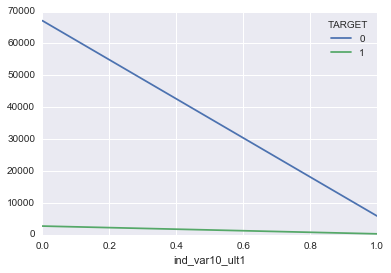

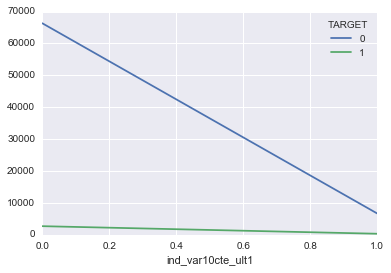

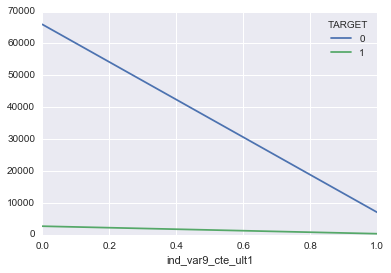

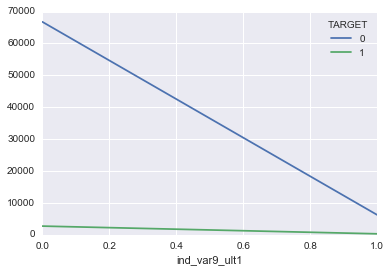

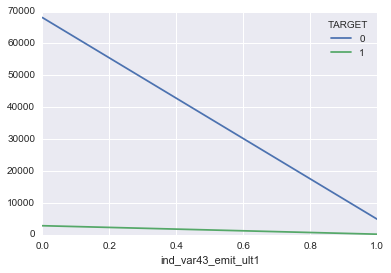

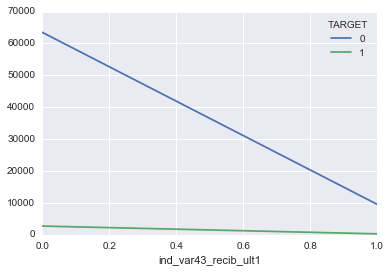

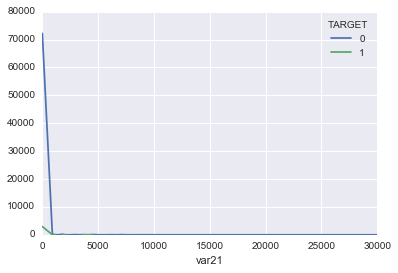

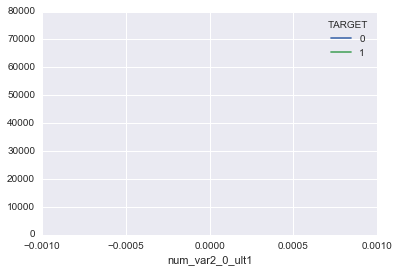

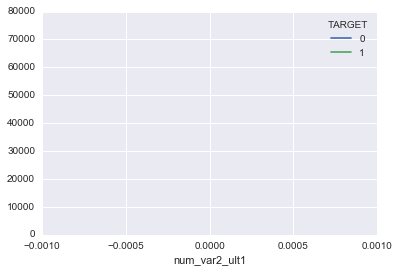

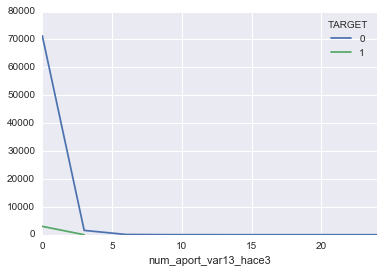

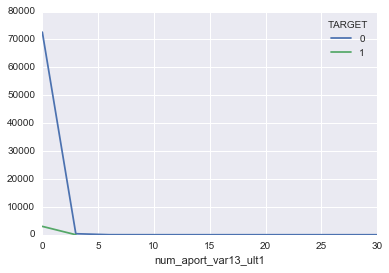

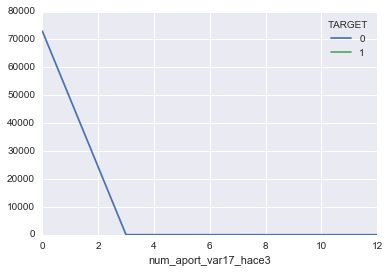

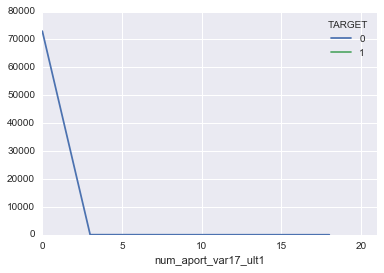

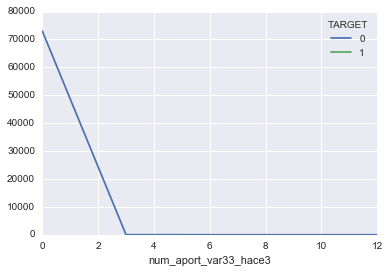

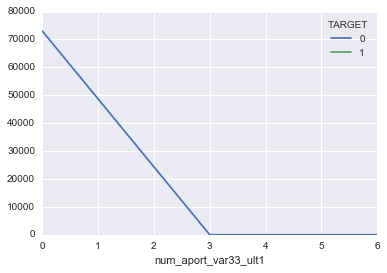

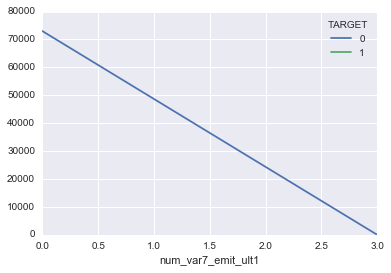

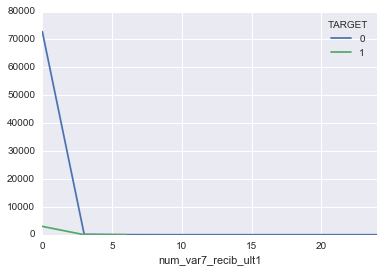

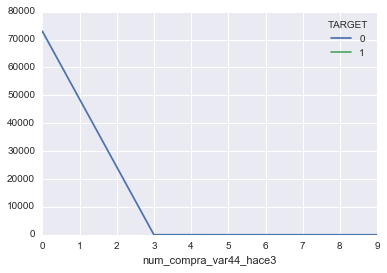

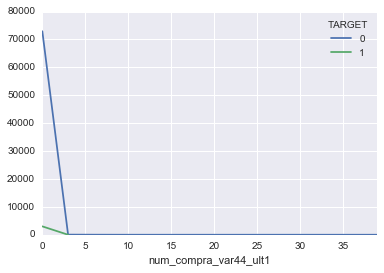

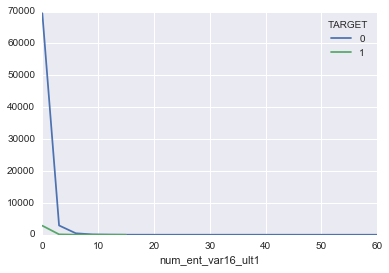

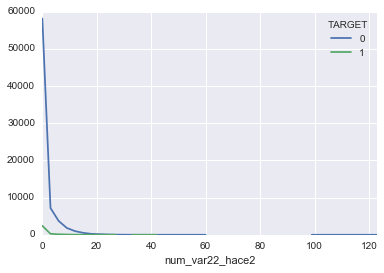

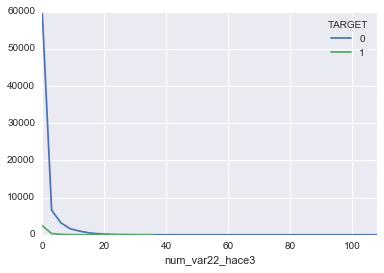

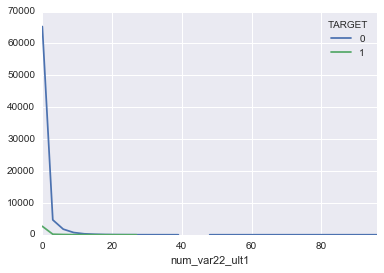

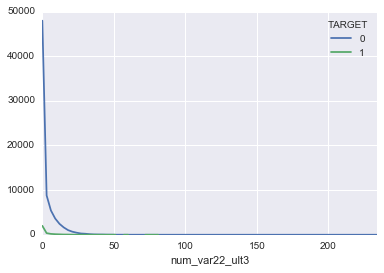

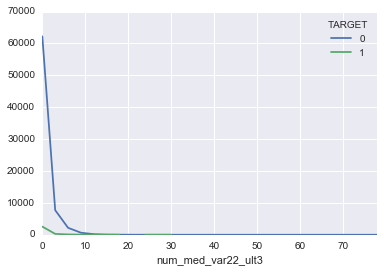

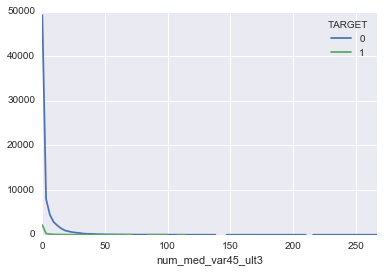

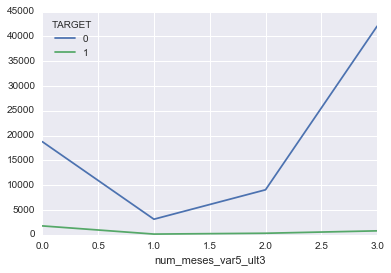

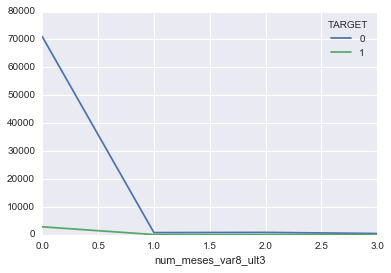

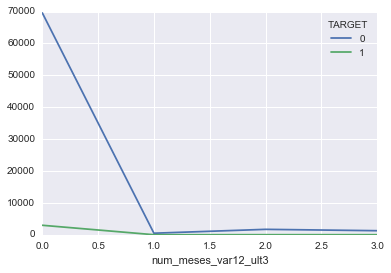

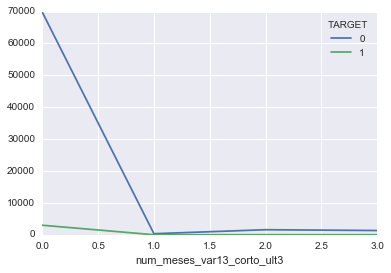

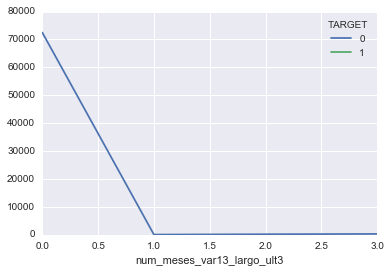

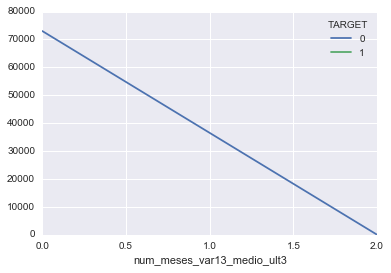

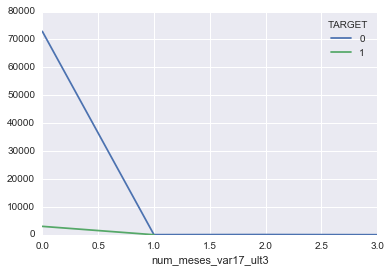

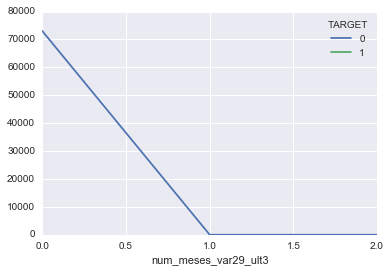

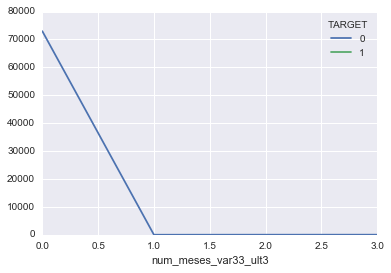

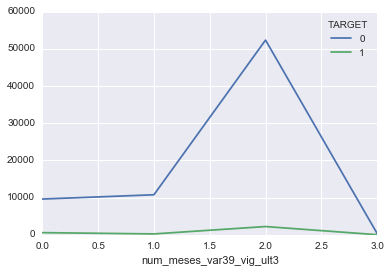

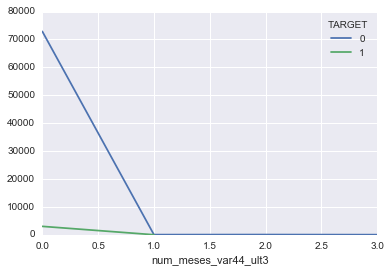

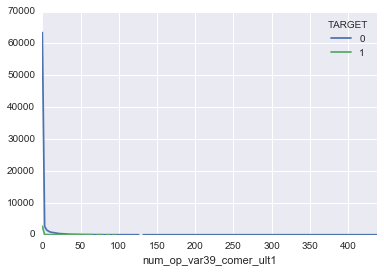

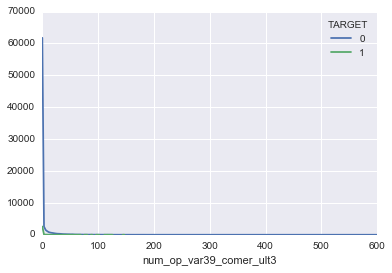

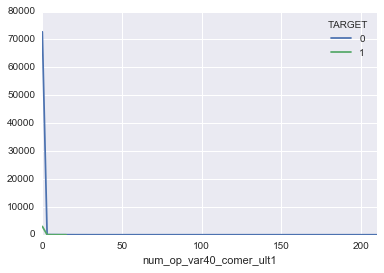

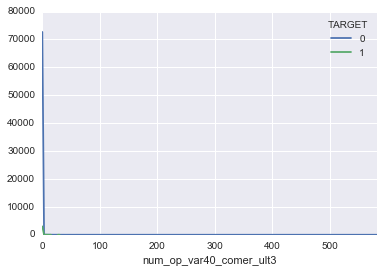

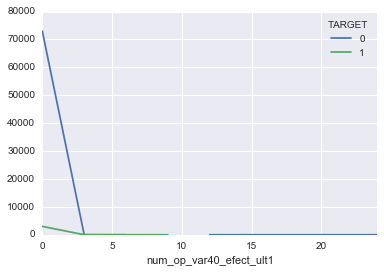

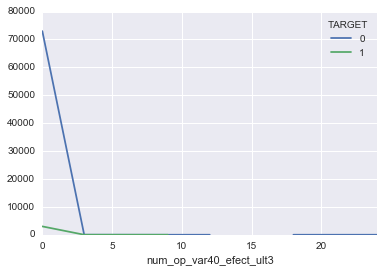

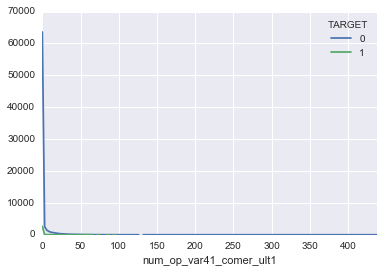

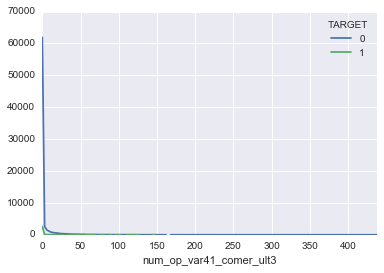

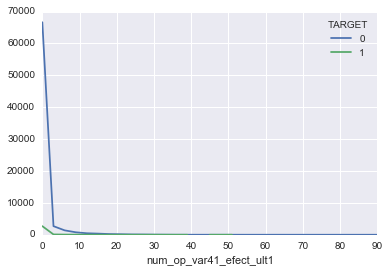

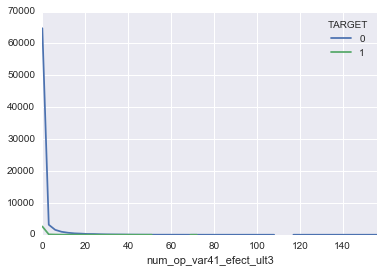

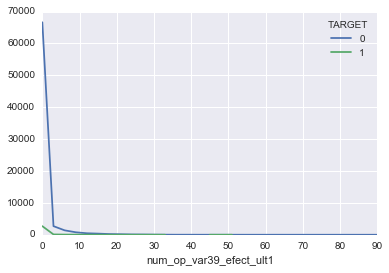

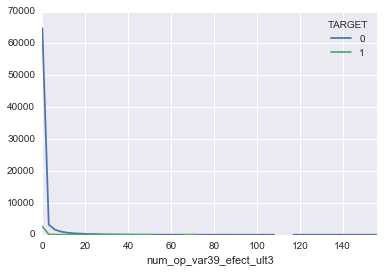

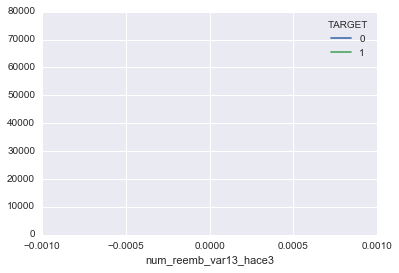

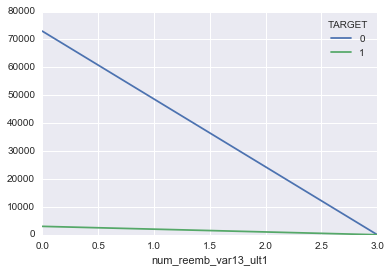

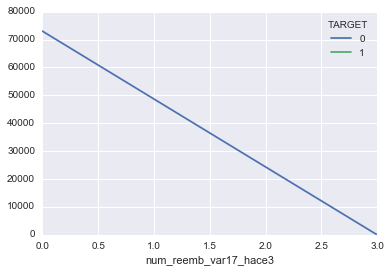

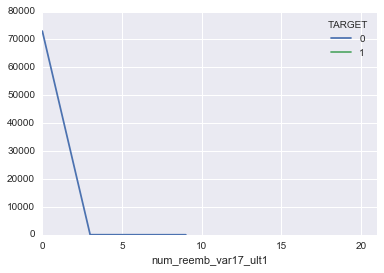

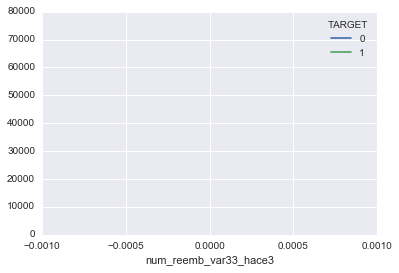

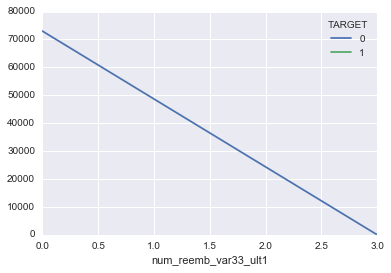

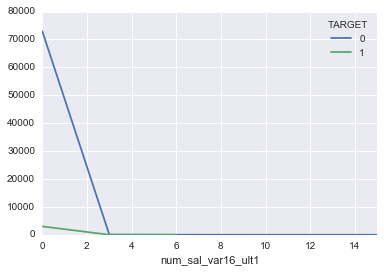

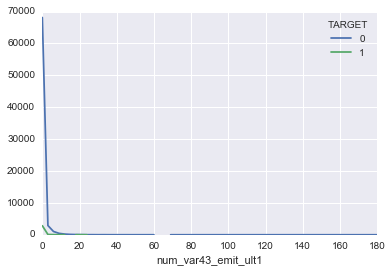

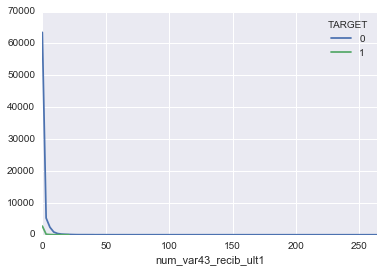

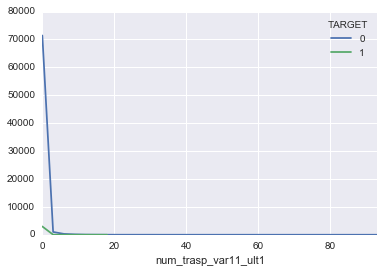

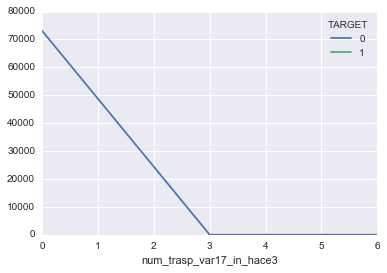

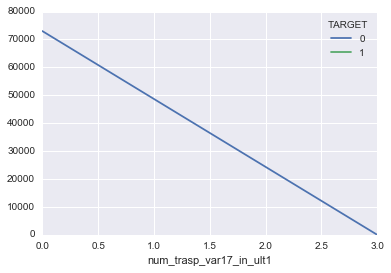

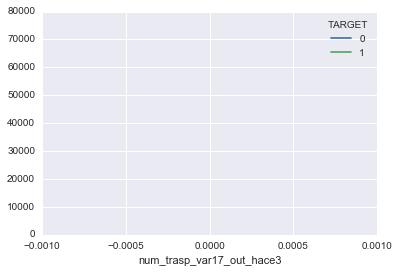

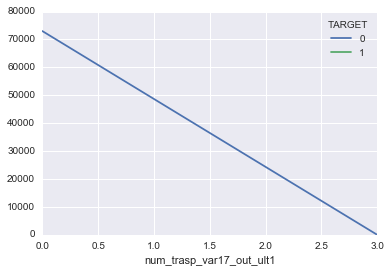

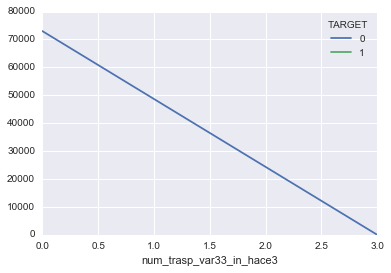

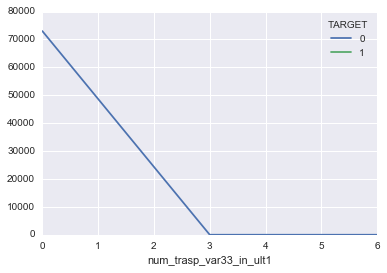

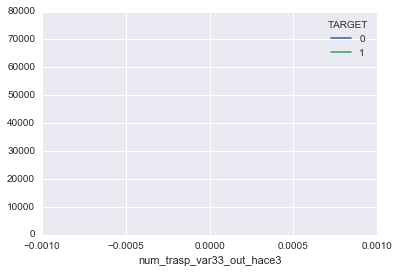

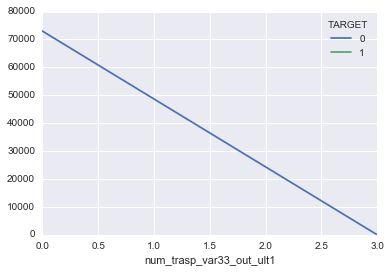

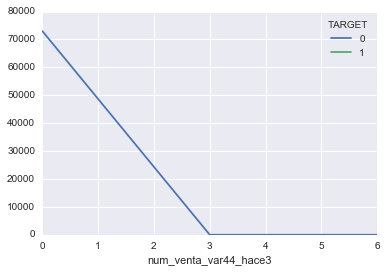

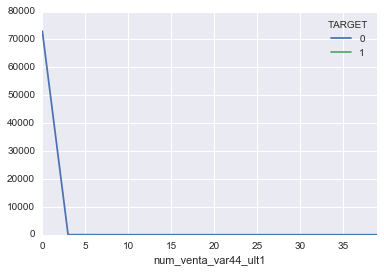

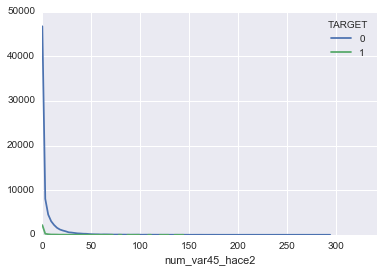

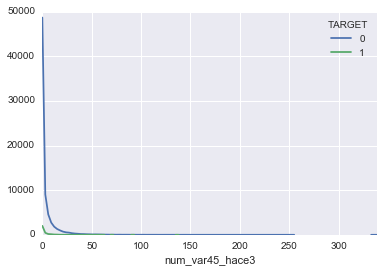

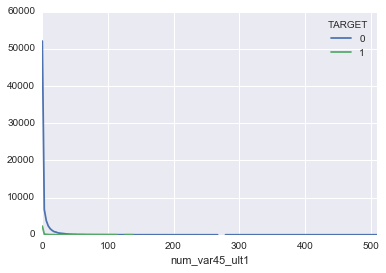

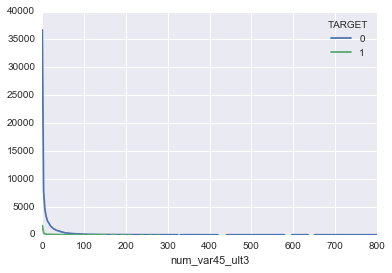

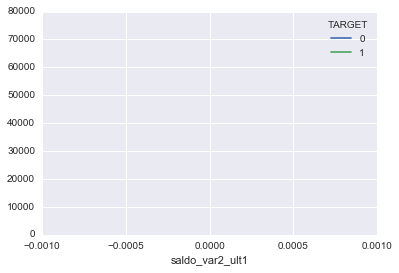

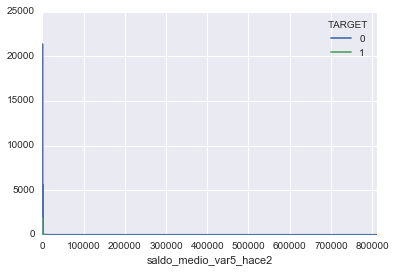

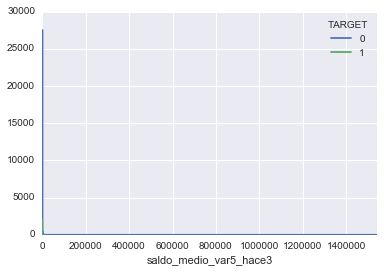

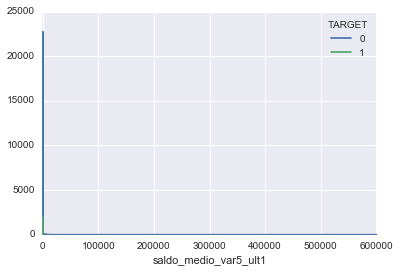

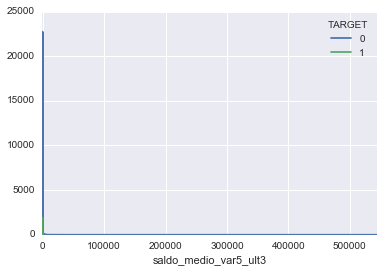

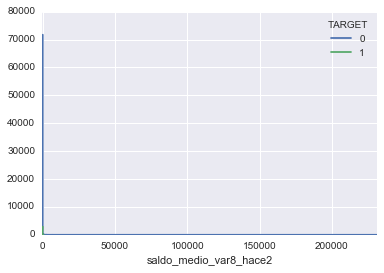

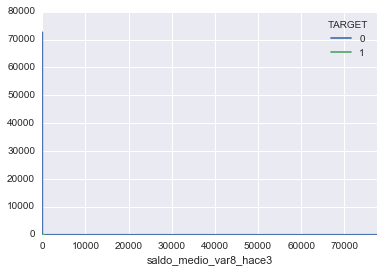

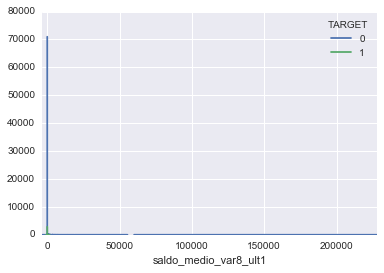

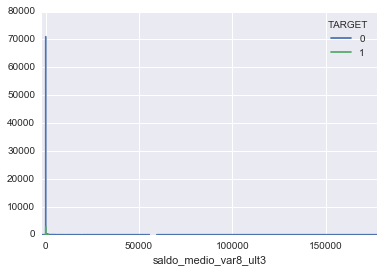

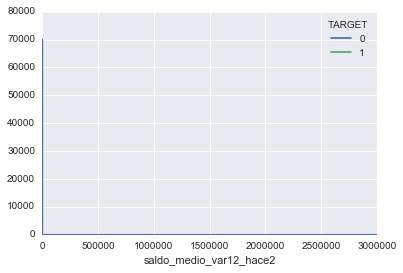

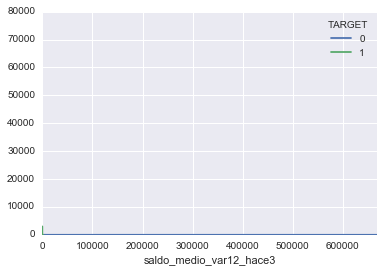

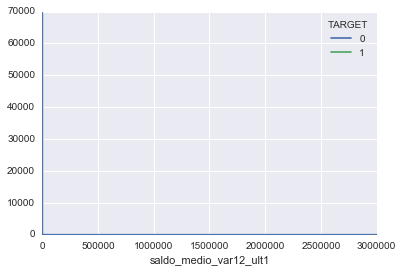

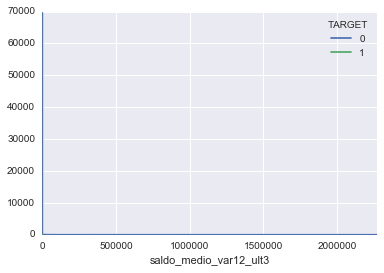

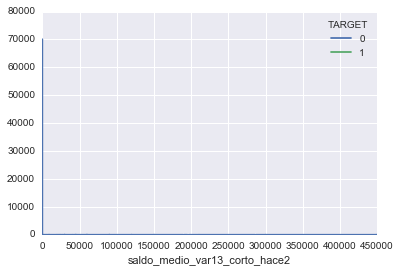

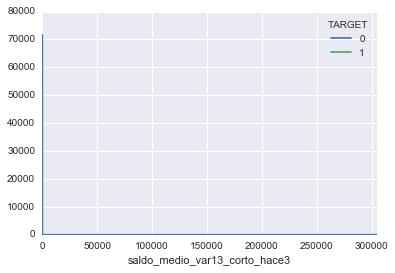

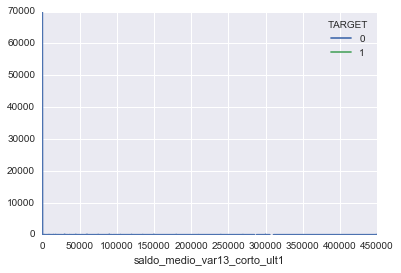

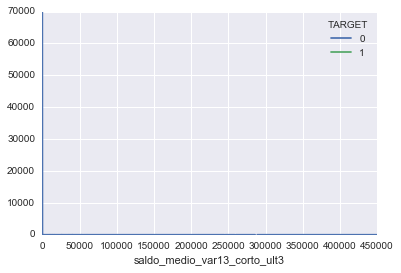

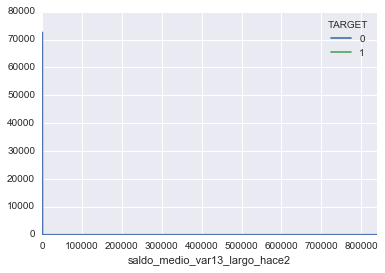

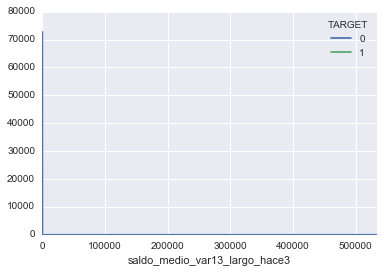

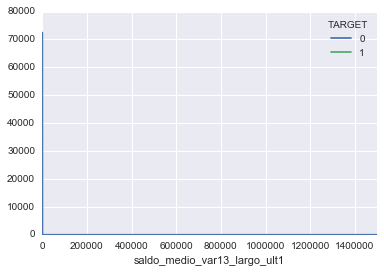

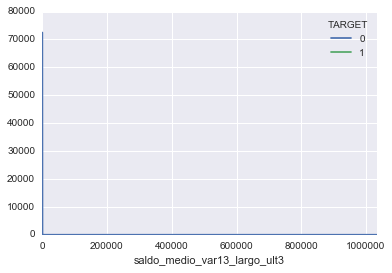

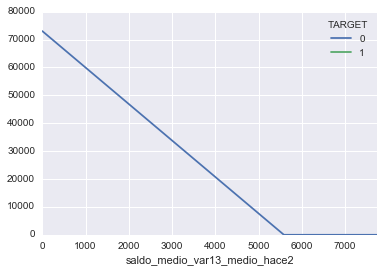

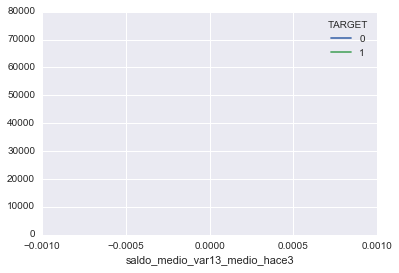

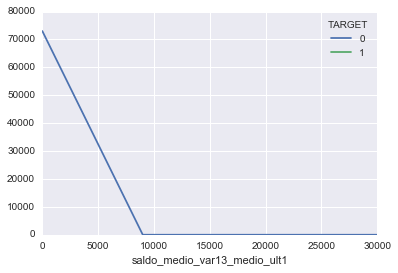

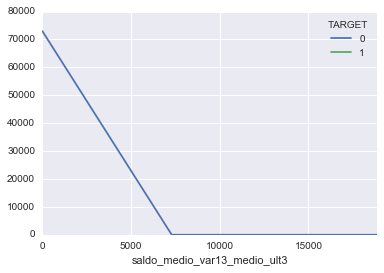

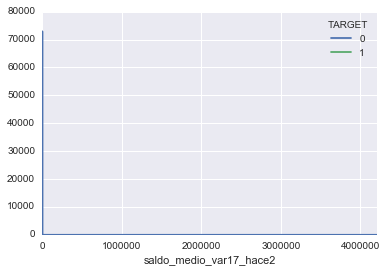

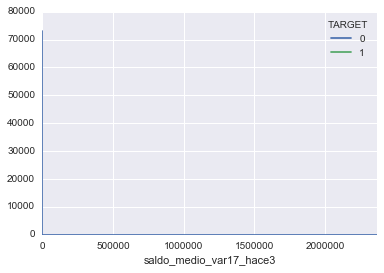

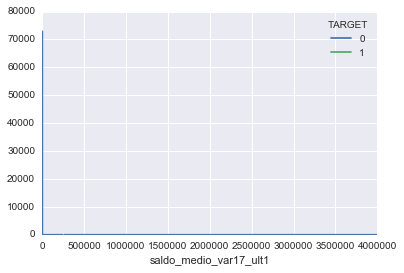

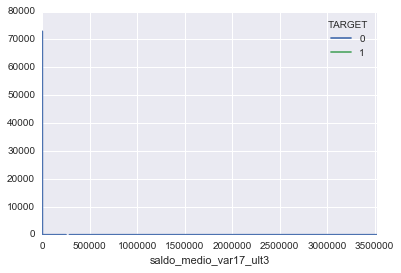

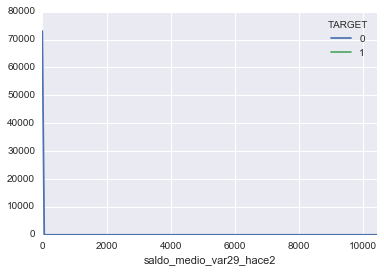

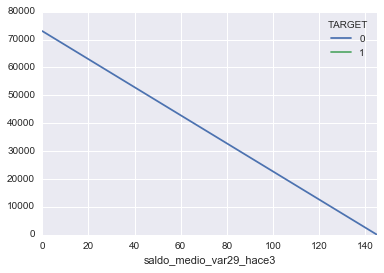

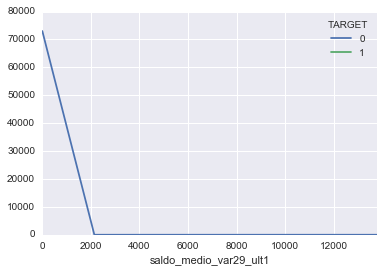

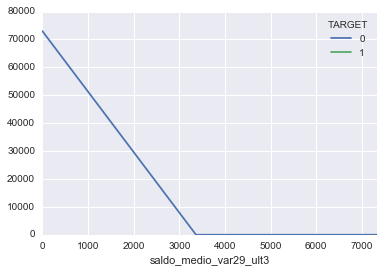

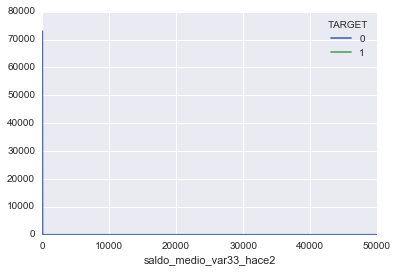

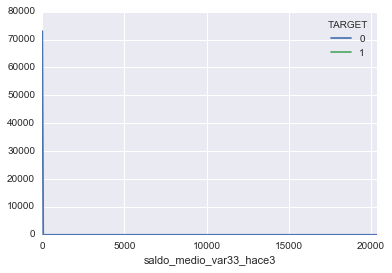

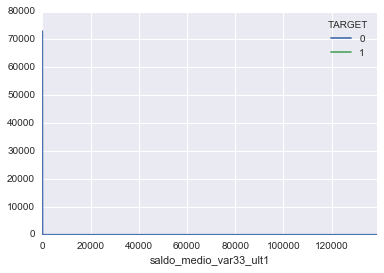

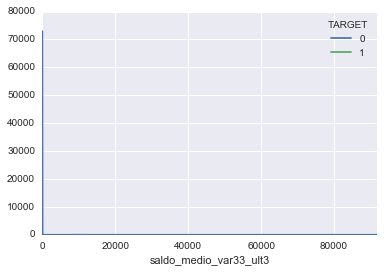

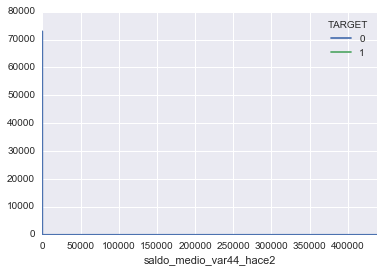

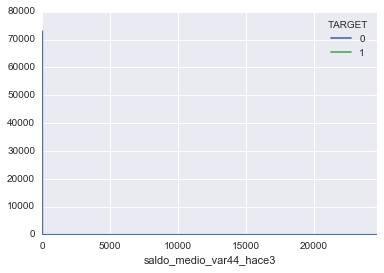

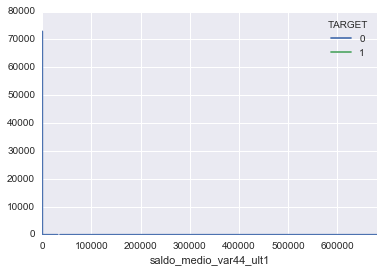

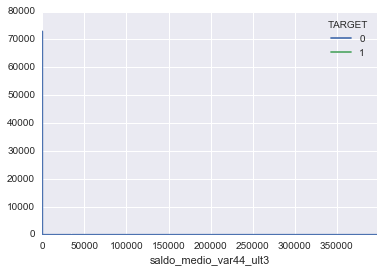

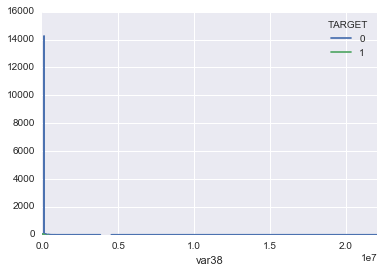

In [84]:
for feature in features:
    train.groupby([feature, 'TARGET']).size().unstack().plot();

## How much information does a feature provide ?

In [128]:
juice_in_variable = {}

for feature in features:
    standard_deviation = train.groupby([feature, 'TARGET']).size().unstack(1).fillna(0)[1].unique().std()
    juice_in_variable[feature] = standard_deviation

## Consider only those customers which were satisfied

In [140]:
satisfied_customers = train[train.TARGET==1]
unsatisfied_customers = train[train.TARGET==0]

In [142]:
most_frequent_value_satisfied = {}
most_frequent_value_unsatisfied = {}

for feature in features:
    most_frequent_value_satisfied[feature] = satisfied_customers[feature].mode()
    most_frequent_value_unsatisfied[feature] = unsatisfied_customers[feature].mode()

In [148]:
for key in most_frequent_value_satisfied:
    print 'Mode of %s for satisfied customers is [%d] and unsatisfied customers is [%d] '\
           %(key, most_frequent_value_satisfied[key], most_frequent_value_unsatisfied[key])

Mode of imp_ent_var16_ult1 for satisfied customers is [0] and unsatisfied customers is [0] 
Mode of num_aport_var13_hace3 for satisfied customers is [0] and unsatisfied customers is [0] 
Mode of imp_aport_var13_hace3 for satisfied customers is [0] and unsatisfied customers is [0] 
Mode of num_op_var40_efect_ult1 for satisfied customers is [0] and unsatisfied customers is [0] 
Mode of num_op_var40_efect_ult3 for satisfied customers is [0] and unsatisfied customers is [0] 
Mode of saldo_var2_ult1 for satisfied customers is [0] and unsatisfied customers is [0] 
Mode of ind_var37_0 for satisfied customers is [0] and unsatisfied customers is [0] 
Mode of ind_var26_cte for satisfied customers is [0] and unsatisfied customers is [0] 
Mode of imp_trasp_var17_out_ult1 for satisfied customers is [0] and unsatisfied customers is [0] 
Mode of num_var33_0 for satisfied customers is [0] and unsatisfied customers is [0] 
Mode of num_trasp_var17_out_hace3 for satisfied customers is [0] and unsatisfied

## Principal Component Analysis

In [184]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

In [207]:
X = train[features].iloc[:10000]
y = train.TARGET.iloc[:10000]

In [208]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [209]:
pca = KernelPCA(n_components=2, kernel='rbf', gamma=.01)
X_pca = pca.fit_transform(X_scaled, y)

In [210]:
negative_class_labels = (y==0).values
positive_class_labels = (y==1).values

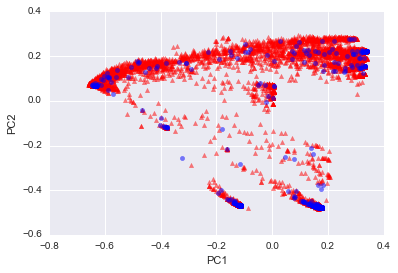

In [211]:
colors = ['b', 'g']
markers = ['s', 'x']

plt.scatter(X_pca[negative_class_labels, 0], X_pca[negative_class_labels, 1],
            color='red', marker='^', alpha=.5)

plt.scatter(X_pca[positive_class_labels, 0], X_pca[positive_class_labels, 1],
            color='blue', marker='o', alpha=.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show();

In [223]:
count = 0

for feature in features:
    percentile = train[feature].quantile(q=0.99)
    satisified_customer_value = satisfied_customers[feature].mean()
    
    if satisified_customer_value > percentile:
        print 'Value greater than 99th percentile for %s ' %(feature)
        count += 1

Value greater than 99th percentile for imp_op_var40_comer_ult1 
Value greater than 99th percentile for imp_op_var40_comer_ult3 
Value greater than 99th percentile for imp_op_var40_efect_ult1 
Value greater than 99th percentile for imp_op_var40_efect_ult3 
Value greater than 99th percentile for imp_op_var40_ult1 
Value greater than 99th percentile for imp_sal_var16_ult1 
Value greater than 99th percentile for ind_var1 
Value greater than 99th percentile for ind_var13_largo 
Value greater than 99th percentile for ind_var14 
Value greater than 99th percentile for ind_var17_0 
Value greater than 99th percentile for ind_var17 
Value greater than 99th percentile for ind_var19 
Value greater than 99th percentile for ind_var31_0 
Value greater than 99th percentile for ind_var31 
Value greater than 99th percentile for ind_var32_cte 
Value greater than 99th percentile for ind_var32_0 
Value greater than 99th percentile for ind_var32 
Value greater than 99th percentile for ind_var40 
Value greate

In [222]:
print 'Total number of features %d and features with value greater than 90th percentile for satisfied customers %d ' %(len(features),\
                                                                                                                      count)

Total number of features 369 and features with value greater than 90th percentile for satisfied customers 80 
